# <span style='font-family:"Times New Roman"'> <span styel=''> **DATA DISCOVERY**

## <span style='font-family:"Times New Roman"'> <span styel=''> *Emile Cohen* 
*February 2020*

**Goal:** In this Notebook, we try to give a first view of the maf file created with the *../dataframe_generation/maf_creation.ipynb* script. This is a descriptive notebook.
    
The Notebook is divided in 3 parts:
   
* **1. Basic Analysis**
* **2. TP53 Mutations (Pan Analysis)**
* **3. TP53 Mutations (Per Cancer)**

**NB1:** In each part, you must run the cells from the begining in order to initialize the variables

**NB2:** All functions used for the plots are located in utils/custom_tools.py

In [6]:
%run -i '../../utils/setup_environment.ipy'

import warnings
warnings.filterwarnings('ignore')

data_path = '../../data/'

Setup environment... done!


<span style="color:green">✅ Working on **mskimpact_env** conda environment.</span>

In [2]:
maf_tp53 = pd.read_pickle(data_path + 'merged_data/maf_tp53.pkl')
cohort = pd.read_csv(data_path + 'impact-facets-tp53/raw/default_qc_pass.cohort.txt', sep='\t')
maf_cohort = pd.read_pickle(data_path + 'merged_data/maf_cohort.pkl')

## Basic Analysis

In [3]:
print('Number of patients in the cohort: ' + str(len(set(cohort.sample_id.str[:9]))))
print('Number of patients with clinical Info in the cohort: ' + str(len(set(maf_cohort.Patient_Id))))
print('Number of patients with mutated TP53: ' + str(len(set(maf_tp53.Patient_Id))))
print('Proportion of tp53 mutated patients in the cohort: ' + str(round(100*11982/27021,1)) + '%')

Number of patients in the cohort: 27021
Number of patients with clinical Info in the cohort: 27075
Number of patients with mutated TP53: 11982
Proportion of tp53 mutated patients in the cohort: 44.3%


In [4]:
# We eliminate patient duplicates to count the number of cancers
maf_cohort_un = maf_cohort.drop_duplicates('Patient_Id')
# Counting patients with no inofrmation on caddncer type
print('Number of cohort patients without cancer type information: '+str(maf_cohort.Cancer_Type.isna().sum()))


Number of cohort patients without cancer type information: 122



 Number of patients without cancer type information: 7


,count
Cancer_Type,
Non-Small Cell Lung Cancer,3791
Breast Cancer,3681
Colorectal Cancer,2833
Prostate Cancer,1434
Pancreatic Cancer,1428
Glioma,1424
Melanoma,1027
Endometrial Cancer,1002
Ovarian Cancer,985


count    26081
dtype: int64


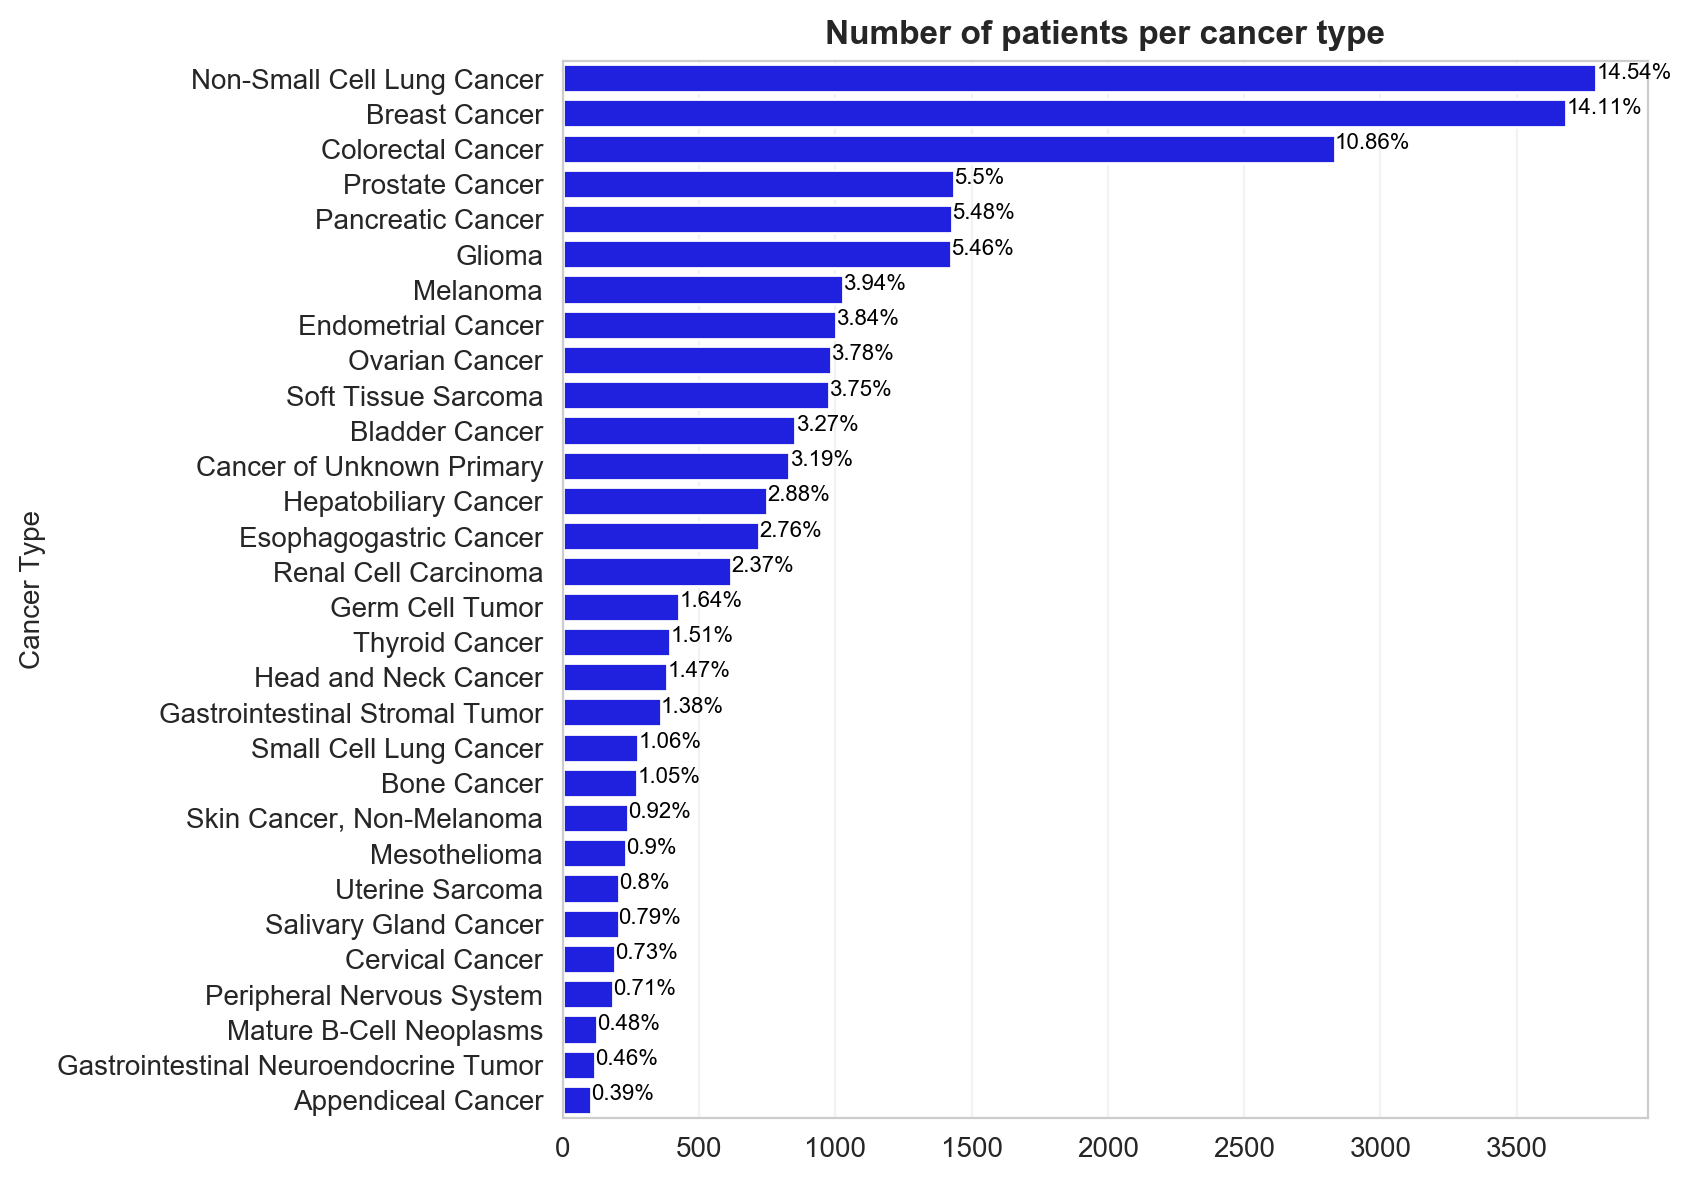

In [8]:
# Counting mutations per patient
cancer_count = pd.DataFrame(maf_cohort_un[['Cancer_Type']].groupby(['Cancer_Type']).size(), columns = ['count'])
# We select only cancers with more than 100 patients
cancer_count = cancer_count[cancer_count['count'] >= 100]
#Sorting the count
cancer_count = cancer_count.sort_values(by=['count'], ascending=False)

print('\n Number of patients without cancer type information: '+str(maf_cohort_un.Cancer_Type.isna().sum()))
display(cancer_count)
print(cancer_count.sum())

#plot
get_ploth(cancer_count.index, 'count', cancer_count, 'Cancer Type', '','Number of patients per cancer type',figsize=(7,7), perc=True)


 Number of tp53 mutated patients without cancer type information: 5


,count
Cancer_Type,
Colorectal Cancer,2081
Non-Small Cell Lung Cancer,2027
Breast Cancer,1385
Pancreatic Cancer,969
Ovarian Cancer,751
Esophagogastric Cancer,524
Glioma,501
Endometrial Cancer,494
Cancer of Unknown Primary,441


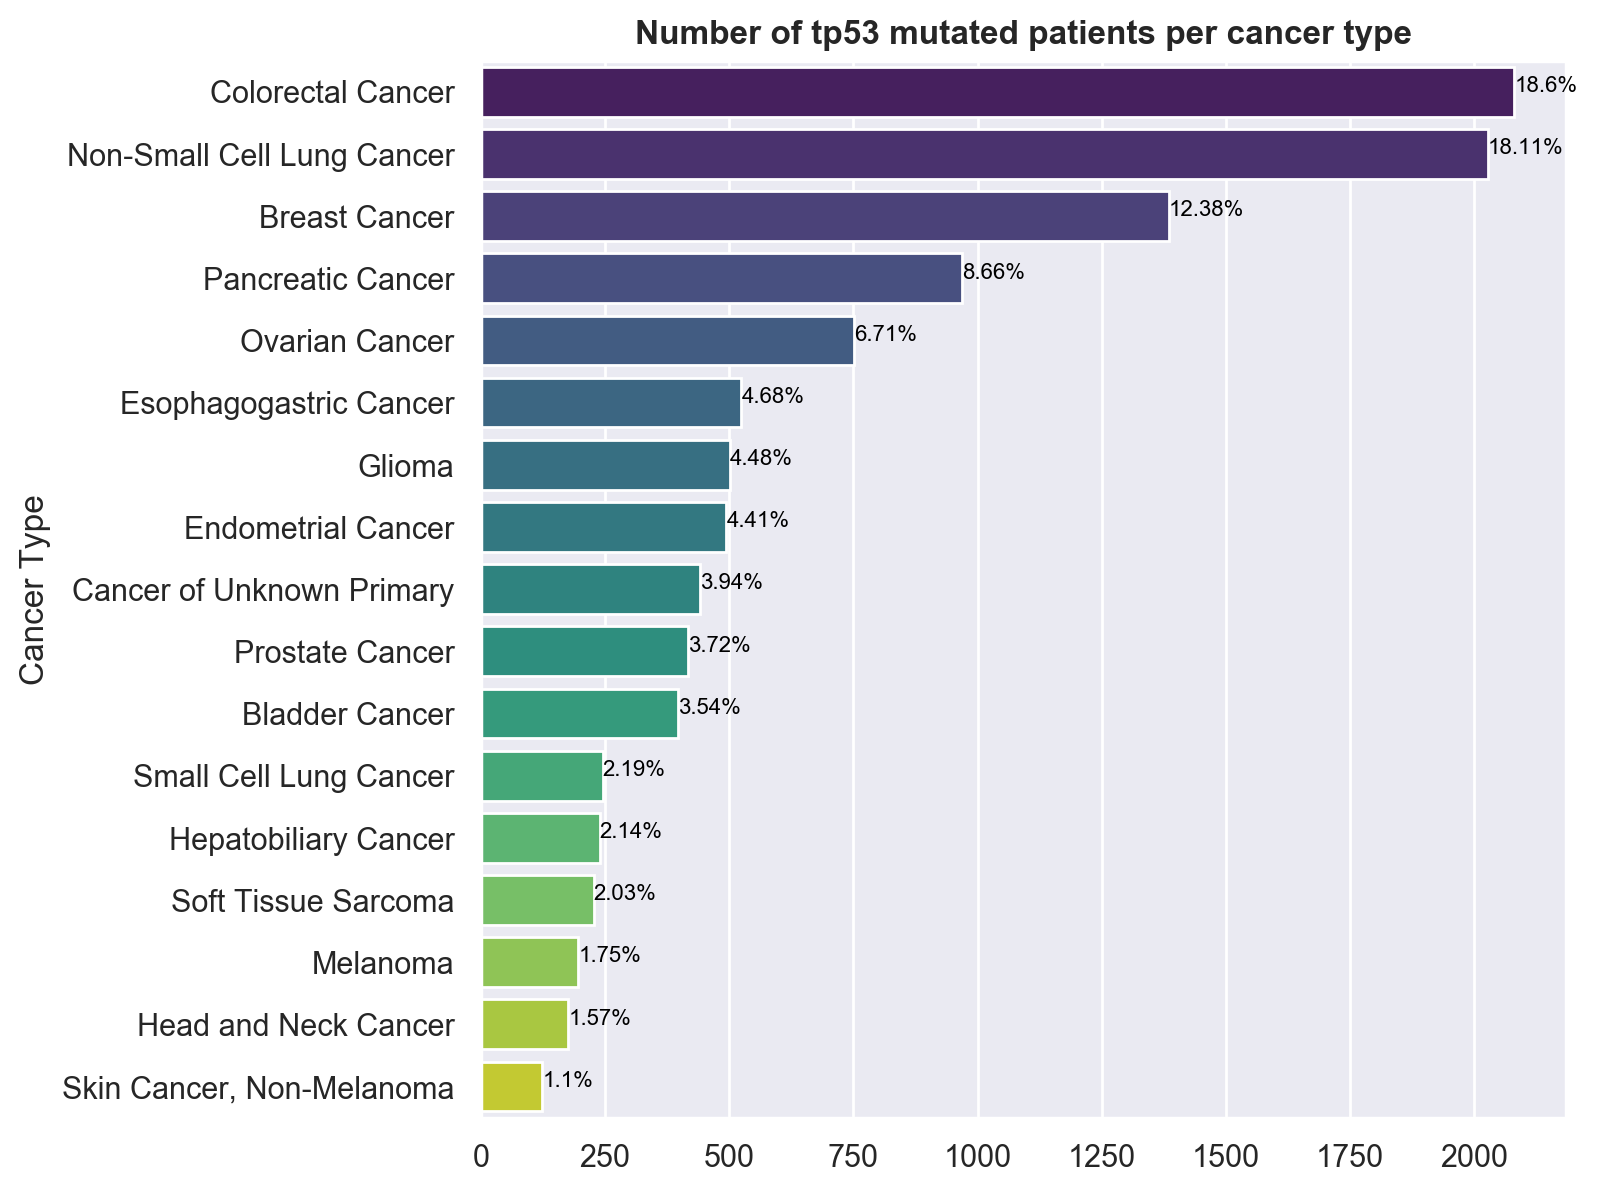

In [433]:
# We eliminate patient duplicates to count the number of cancers
maf_tp53_un = maf_tp53.drop_duplicates('Patient_Id')
# Counting mutations per patient
cancer_count = pd.DataFrame(maf_tp53_un[['Cancer_Type']].groupby(['Cancer_Type']).size(), columns = ['count'])
# We select only cancers with more than 100 patients
cancer_count = cancer_count[cancer_count['count'] >= 100]
#Sorting the count
cancer_count = cancer_count.sort_values(by=['count'], ascending=False)

print('\n Number of tp53 mutated patients without cancer type information: '+str(maf_tp53_un.Cancer_Type.isna().sum()))
display(cancer_count)

#plot
get_ploth(cancer_count.index, 'count', cancer_count, 'Cancer Type', '','Number of tp53 mutated patients per cancer type',figsize=(7,7), perc=True)

---
The tp53 mutated cohort is composed of 53 different cancer types. 16 cancer types are composed of more than 100 patients.

From:
* **Skin Cancer, Non-Melanoma:** 123 patients

To:
* **Colorectal Cancer:** 2081 patients


## TP53 Mutations (Pan Cancer Analysis)

In this section, we analyse the number of mutations per patient without considering the cancer type. Then we make the difference between primary and metastatic samples.

### All samples

,count
count,
1,11726
2,886
3,95
4,17
5,4


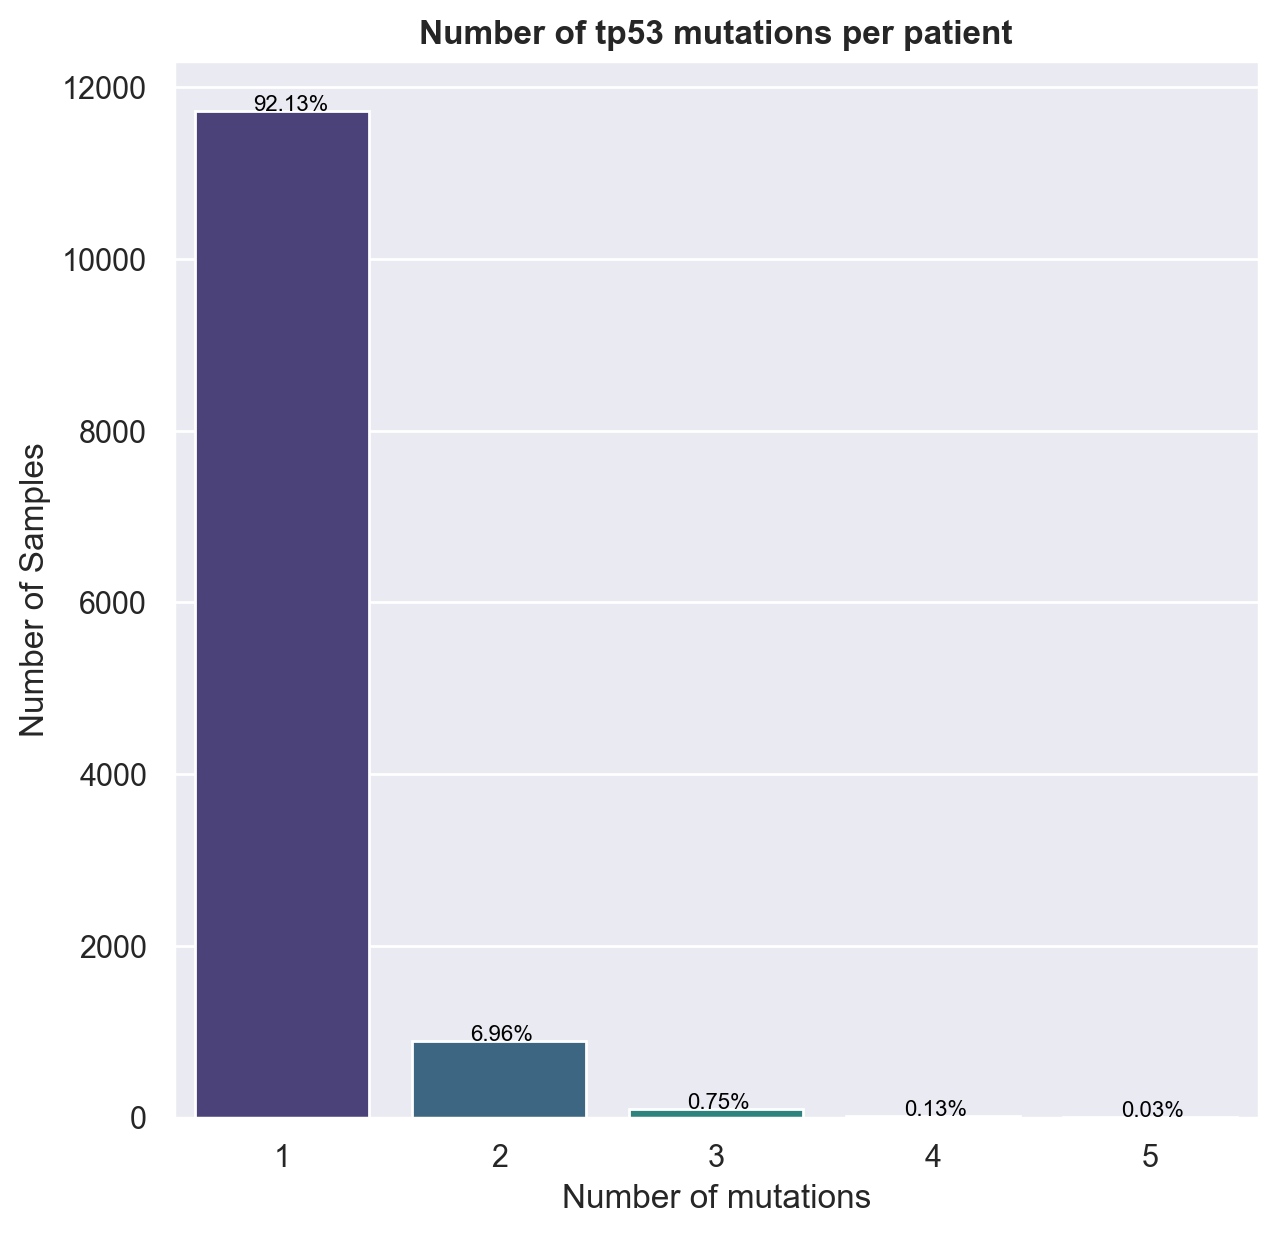

In [21]:
#we filter out the duplicates
maf_tp53_unique = maf_tp53.drop_duplicates('sample_mut_key')
# Group by patient and count the line per patient = the number of mutations per patient
# Then we groupby count and calculate the size of each count (1,2,3,4,5) so that we have 
# the number of patients for each mutation count
count = pd.DataFrame(pd.DataFrame(maf_tp53_unique[['Sample_Id']].groupby(['Sample_Id']).size(), columns = ['count']).groupby(['count']).size())
#We rename the column
count.columns = ['count']
display(count)

#plot
get_plotv('count', count.index, count, 'Number of Samples', 'Number of mutations','Number of tp53 mutations per patient',figsize=(7,7), perc=True)

### Filtering on the Sample_Type

First we take a look at the distribution of primary/metastatic sample distribution accross tp53 mutated cohort

,Sample_Type
Primary,0.576743
Metastasis,0.423257


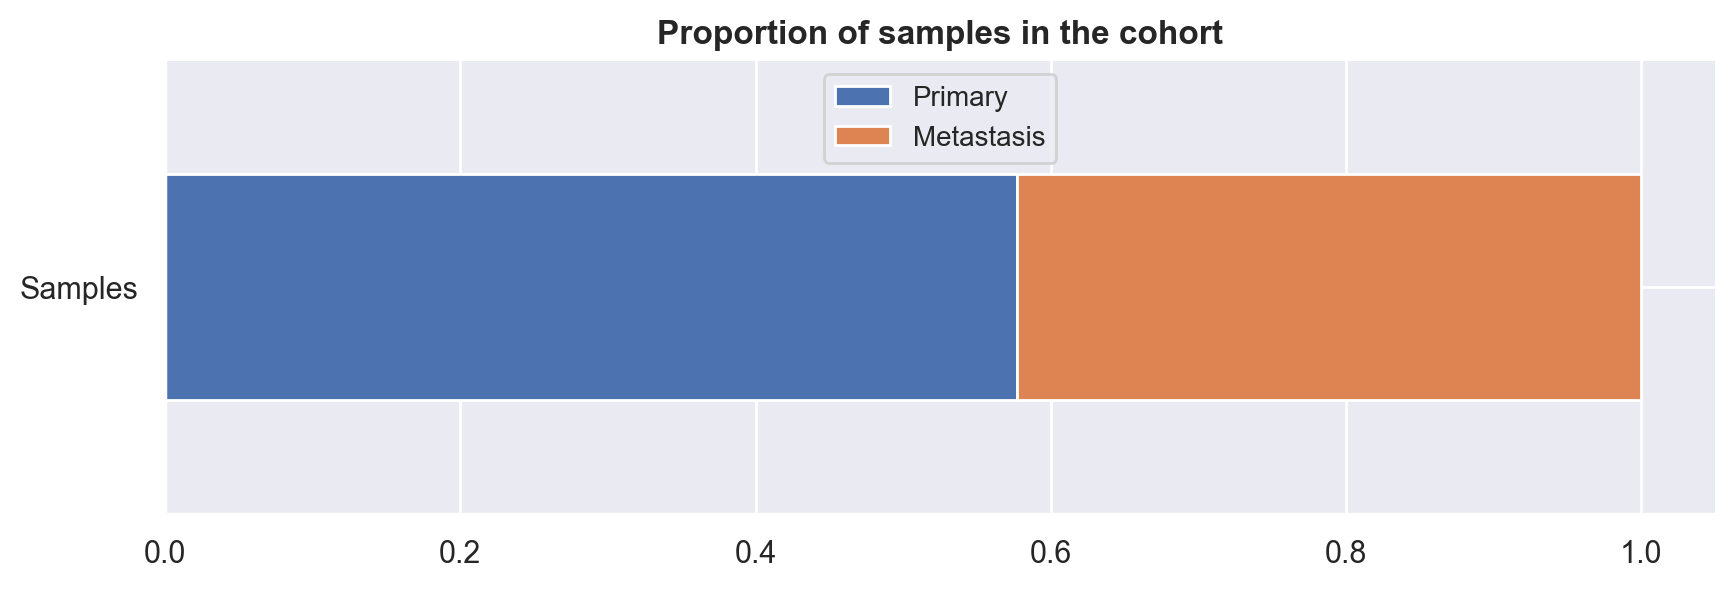

In [425]:
maf_tp53_unique = maf_tp53.drop_duplicates('sample_mut_key')

#plot
get_sstacked_plot(maf_tp53_unique, 'Sample_Type', 'Proportion of samples in the cohort', '', 'Samples', ncol=1, disp=True)

### Primary Samples

,count
count,
1,6553
2,589
3,66
4,14
5,3


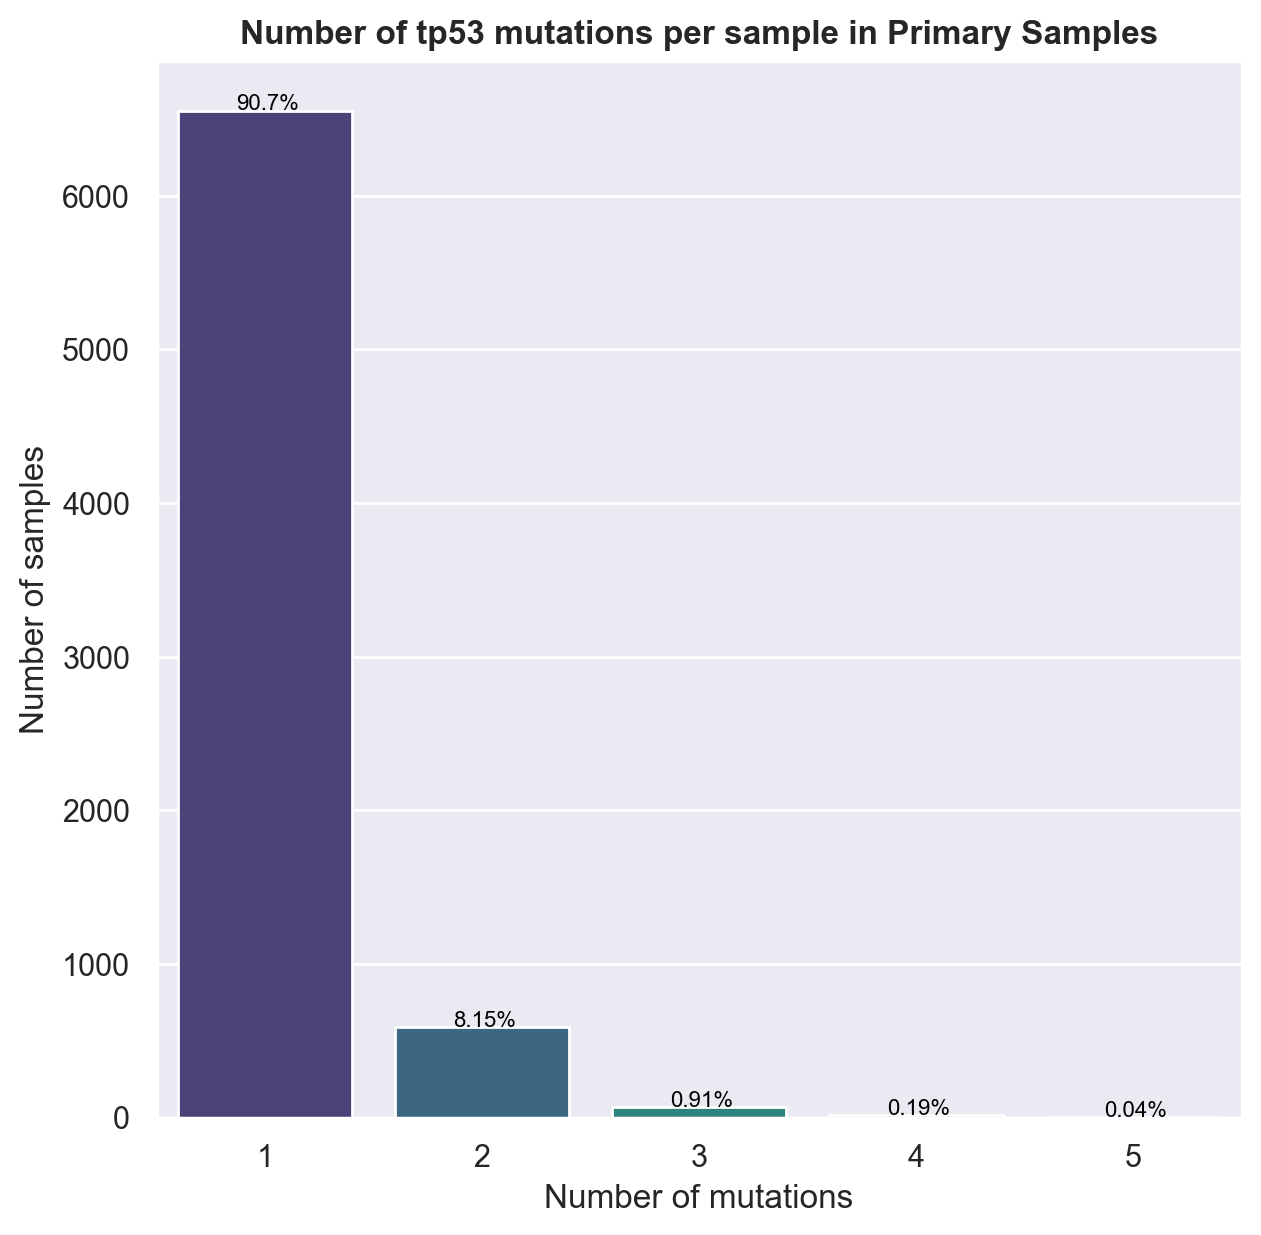

In [22]:
# We filter out the duplicates and keep only the Primary Samples
maf_tp53_unique = maf_tp53.drop_duplicates('sample_mut_key')[maf_tp53['Sample_Type']=='Primary']
# Group by patient and count the line per patient = the number of mutations per patient
# Then we groupby count and calculate the size of each count (1,2,3,4,5) so that we have 
# the number of patients for each mutation count
count = pd.DataFrame(pd.DataFrame(maf_tp53_unique[['Sample_Id']].groupby(['Sample_Id']).size(), columns = ['count']).groupby(['count']).size())
#We rename the column
count.columns = ['count']
display(count)

get_plotv('count', count.index, count, 'Number of samples', 'Number of mutations','Number of tp53 mutations per sample in Primary Samples',figsize=(7,7), perc=True)

### Metastatic Samples

,count
count,
1,5173
2,297
3,29
4,3
5,1


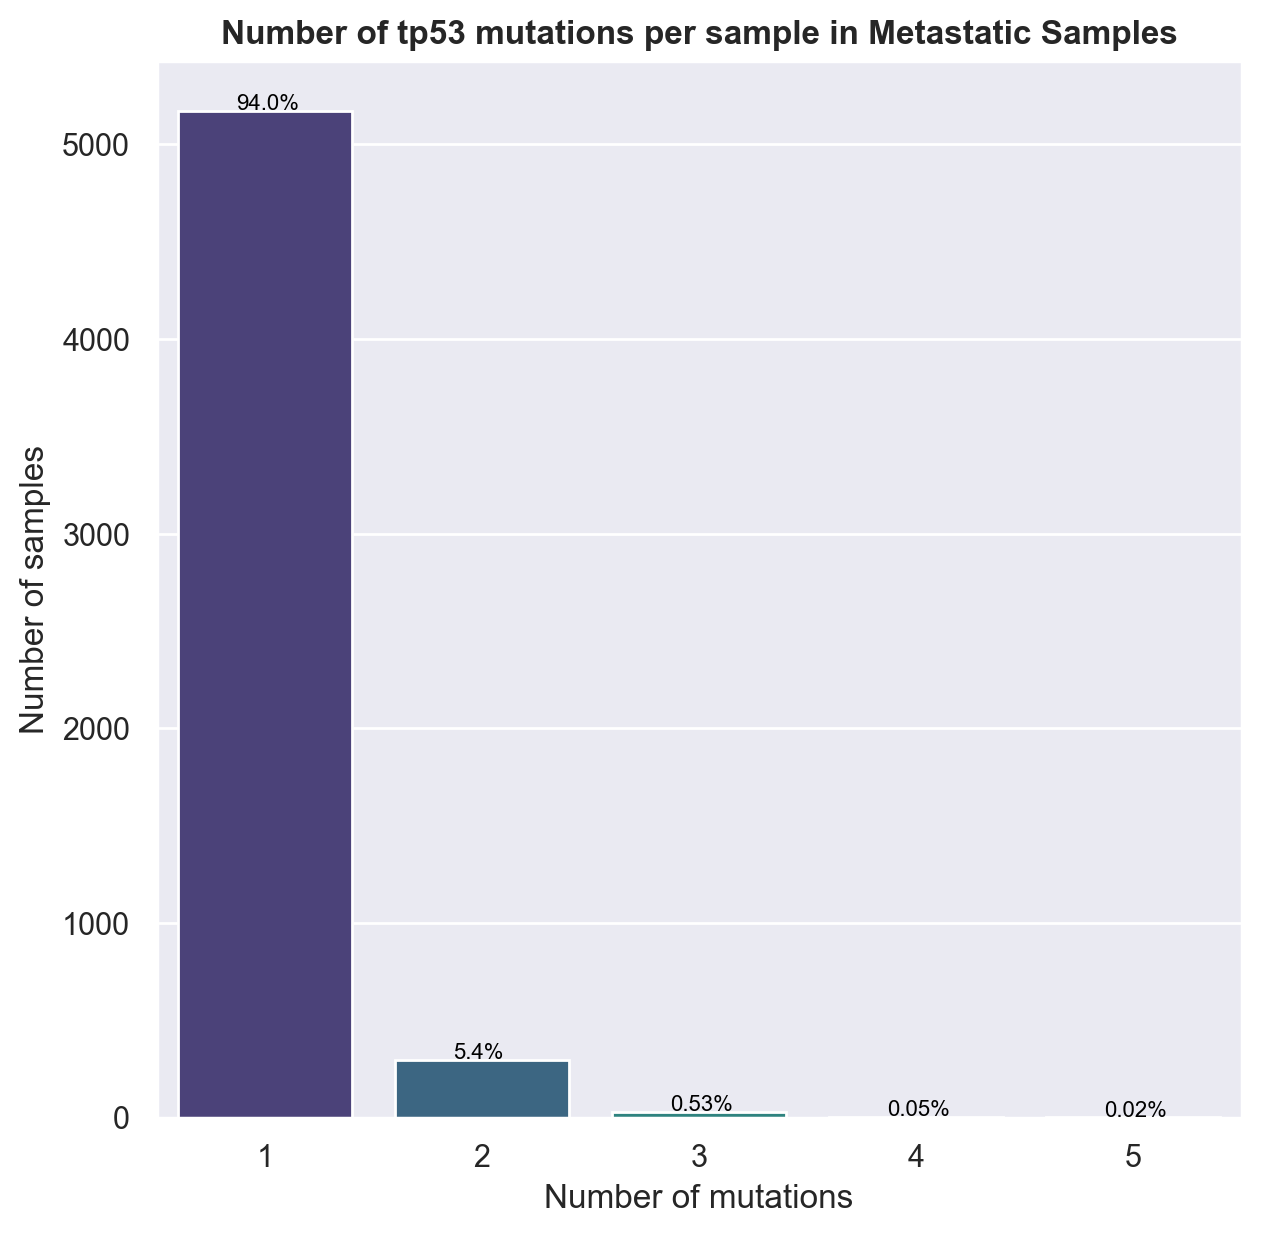

In [23]:
# We filter out the duplicates and keep only the Primary Samples
maf_tp53_unique = maf_tp53.drop_duplicates('sample_mut_key')[maf_tp53['Sample_Type']=='Metastasis']
# Group by patient and count the line per patient = the number of mutations per patient
# Then we groupby count and calculate the size of each count (1,2,3,4,5) so that we have 
# the number of patients for each mutation count
count = pd.DataFrame(pd.DataFrame(maf_tp53_unique[['Sample_Id']].groupby(['Sample_Id']).size(), columns = ['count']).groupby(['count']).size())
#We rename the column
count.columns = ['count']
display(count)

get_plotv('count', count.index, count, 'Number of samples', 'Number of mutations','Number of tp53 mutations per sample in Metastatic Samples',figsize=(7,7), perc=True)

---
**Conclusion:** the plots show that **90 %** of tp53 mutated patients have only one hit. Moreover, primary samples are enriched in multiple hits in comparison with Metastatic samples (**8.56 %** and **5.51 %** of double hits respectively)

---

## TP53 Mutations (Per Cancer)

In [4]:
def get_numberhits(string, threshold):
    '''
    We define the function get_numberhits that allows to compute the df of the distribution of multiple hits for 
    each cancer for all samples, metastasis samples and primary samples.
    Aruments:
        - string: string that determines if we filter on Sample_Type
        - threshold: integer that determines the minimal number of mutations per cancer to consider it
    '''
    #filtering_out the duplicates
    maf_tp53_unique = maf_tp53.drop_duplicates('patient_mut_key')
    
    #here we filter the samples if string == Metastatis or Primary
    if string == 'Primary':
        maf_tp53_unique = maf_tp53.drop_duplicates('patient_mut_key')[maf_tp53['Sample_Type']=='Primary']
    if string == 'Metastasis':
        maf_tp53_unique = maf_tp53.drop_duplicates('patient_mut_key')[maf_tp53['Sample_Type']=='Metastasis']
    
    #we groupby ('Patient_Id','Cancer_Type') and apply size to know the number of mutations per patient
    #then, we groupby ('Cancer_Type','count') and apply size to have the count per cancer
    maf_tp53_unique = pd.DataFrame(pd.DataFrame(maf_tp53_unique[['Patient_Id','Cancer_Type']].groupby(['Cancer_Type','Patient_Id']).size(), columns=['count']).groupby(['Cancer_Type','count']).size()).unstack().sort_values(by=[(0,1)])
    # We remove the different column index levels and rename the columns
    maf_tp53_unique.columns = maf_tp53_unique.columns.droplevel()
    maf_tp53_unique.columns = ['one', 'two', 'three','four','five']    
    #We filter the cancer with less than 100 single hits
    maf_tp53_unique = maf_tp53_unique.fillna(0)[maf_tp53_unique['one'] >= threshold]
    
    #We create a new column 'ratio'
    maf_tp53_unique['ratio'] = maf_tp53_unique.apply(lambda x: round(100*(x.two+x.three+x.four+x.five)/(x.one+x.two+x.three+x.four+x.five),2), axis=1)
    # we sort by ratio
    maf_tp53_unique = maf_tp53_unique.sort_values(by=['ratio'])

    return maf_tp53_unique

### All samples

,one,two,three,four,five,ratio
Cancer_Type,,,,,,
Pancreatic Cancer,960.0,9.0,1.0,0.0,0.0,1.03
Ovarian Cancer,741.0,8.0,3.0,0.0,0.0,1.46
Breast Cancer,1349.0,30.0,7.0,1.0,0.0,2.74
Small Cell Lung Cancer,239.0,9.0,0.0,0.0,0.0,3.63
Hepatobiliary Cancer,229.0,9.0,1.0,0.0,0.0,4.18
Prostate Cancer,394.0,24.0,2.0,0.0,0.0,6.19
Colorectal Cancer,1933.0,134.0,16.0,1.0,1.0,7.29
Esophagogastric Cancer,484.0,37.0,3.0,3.0,0.0,8.16
Endometrial Cancer,453.0,33.0,6.0,1.0,1.0,8.30


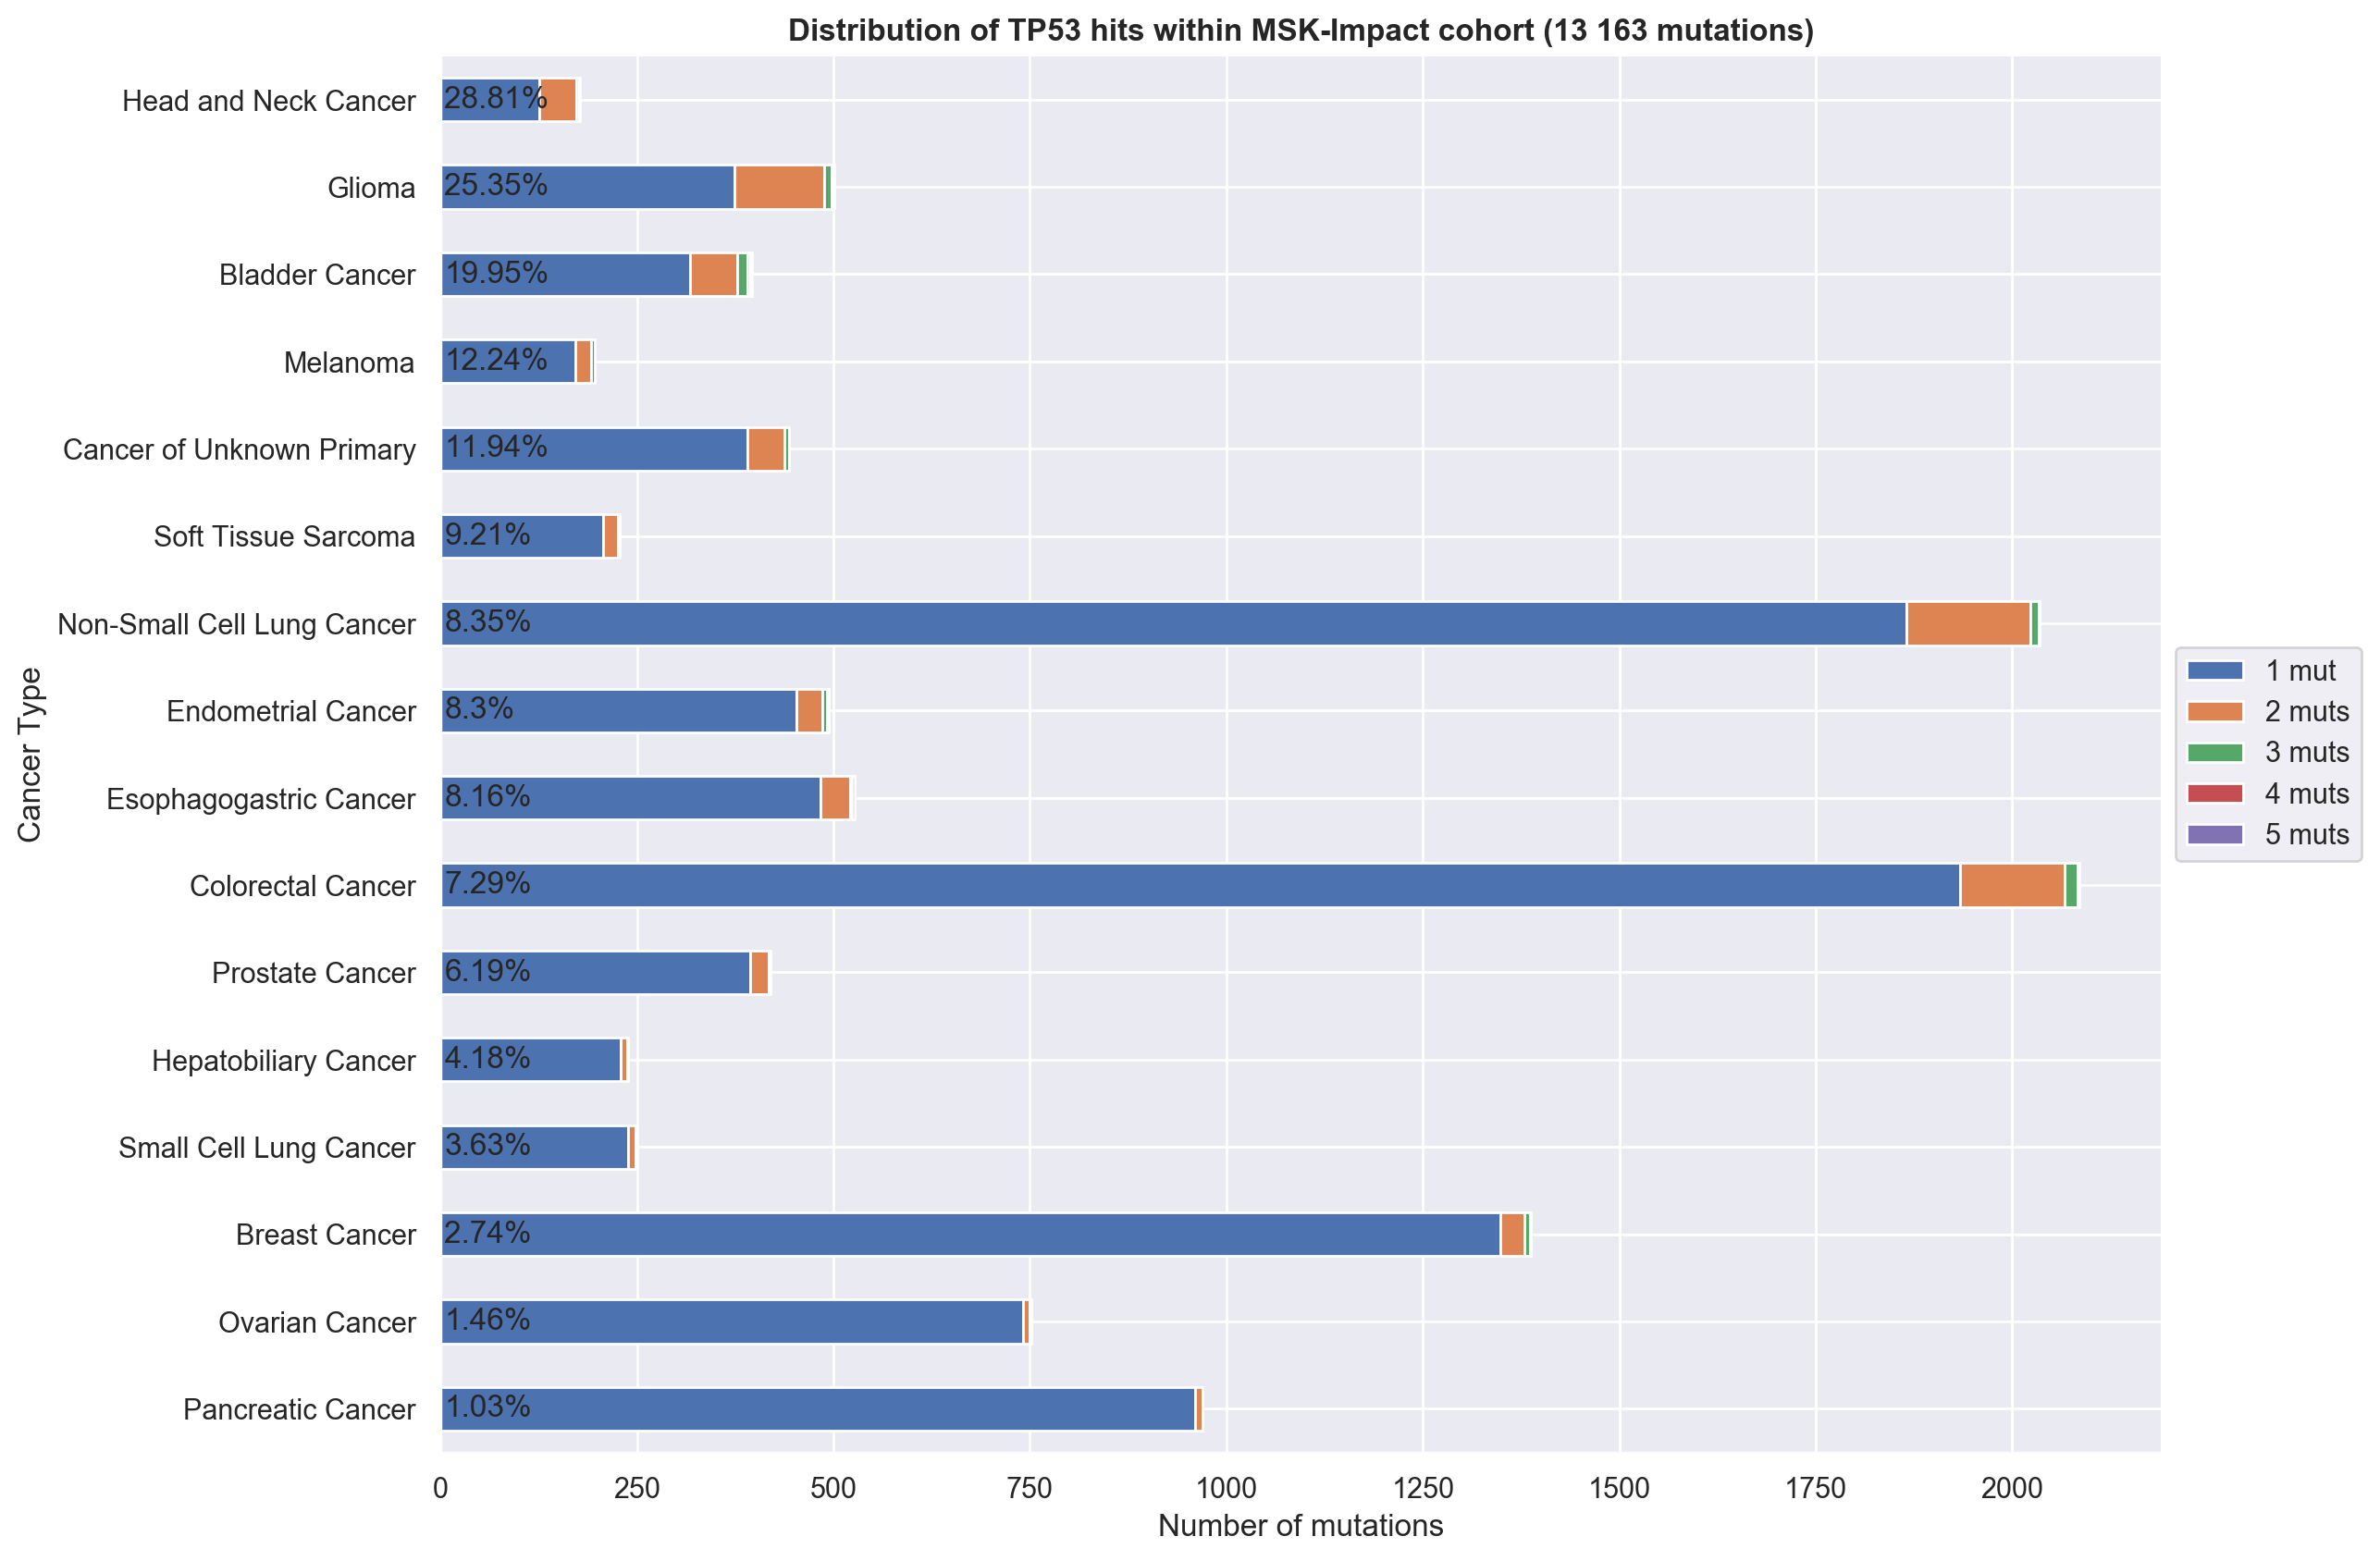

In [10]:
# We compute the dataframe containing the number of hits per cancer
number_hits = get_numberhits('',100)
display(number_hits)

# We plot the table
get_mstacked_plot(number_hits[['one', 'two', 'three','four','five']], 
                  'Distribution of TP53 hits within MSK-Impact cohort (13 163 mutations)',
                  ['1 mut', '2 muts', '3 muts', '4 muts', '5 muts'],
                  'Number of mutations',
                  'Cancer Type',
                  figsize = (15,10),
                  labels = list(number_hits['ratio']),
                  horiz=True)

---
We see that a few cancers are enriched in multiple hits, such as **Glioma**, **Bladder Cancer** or **Head and Neck Cancer** while **Ovarian** or **Pancreatic Cancer** have barely no multiple hits.

Let's take a look at the ratio of multiple hits over single hits for each cancer to really see the enrichment.

---

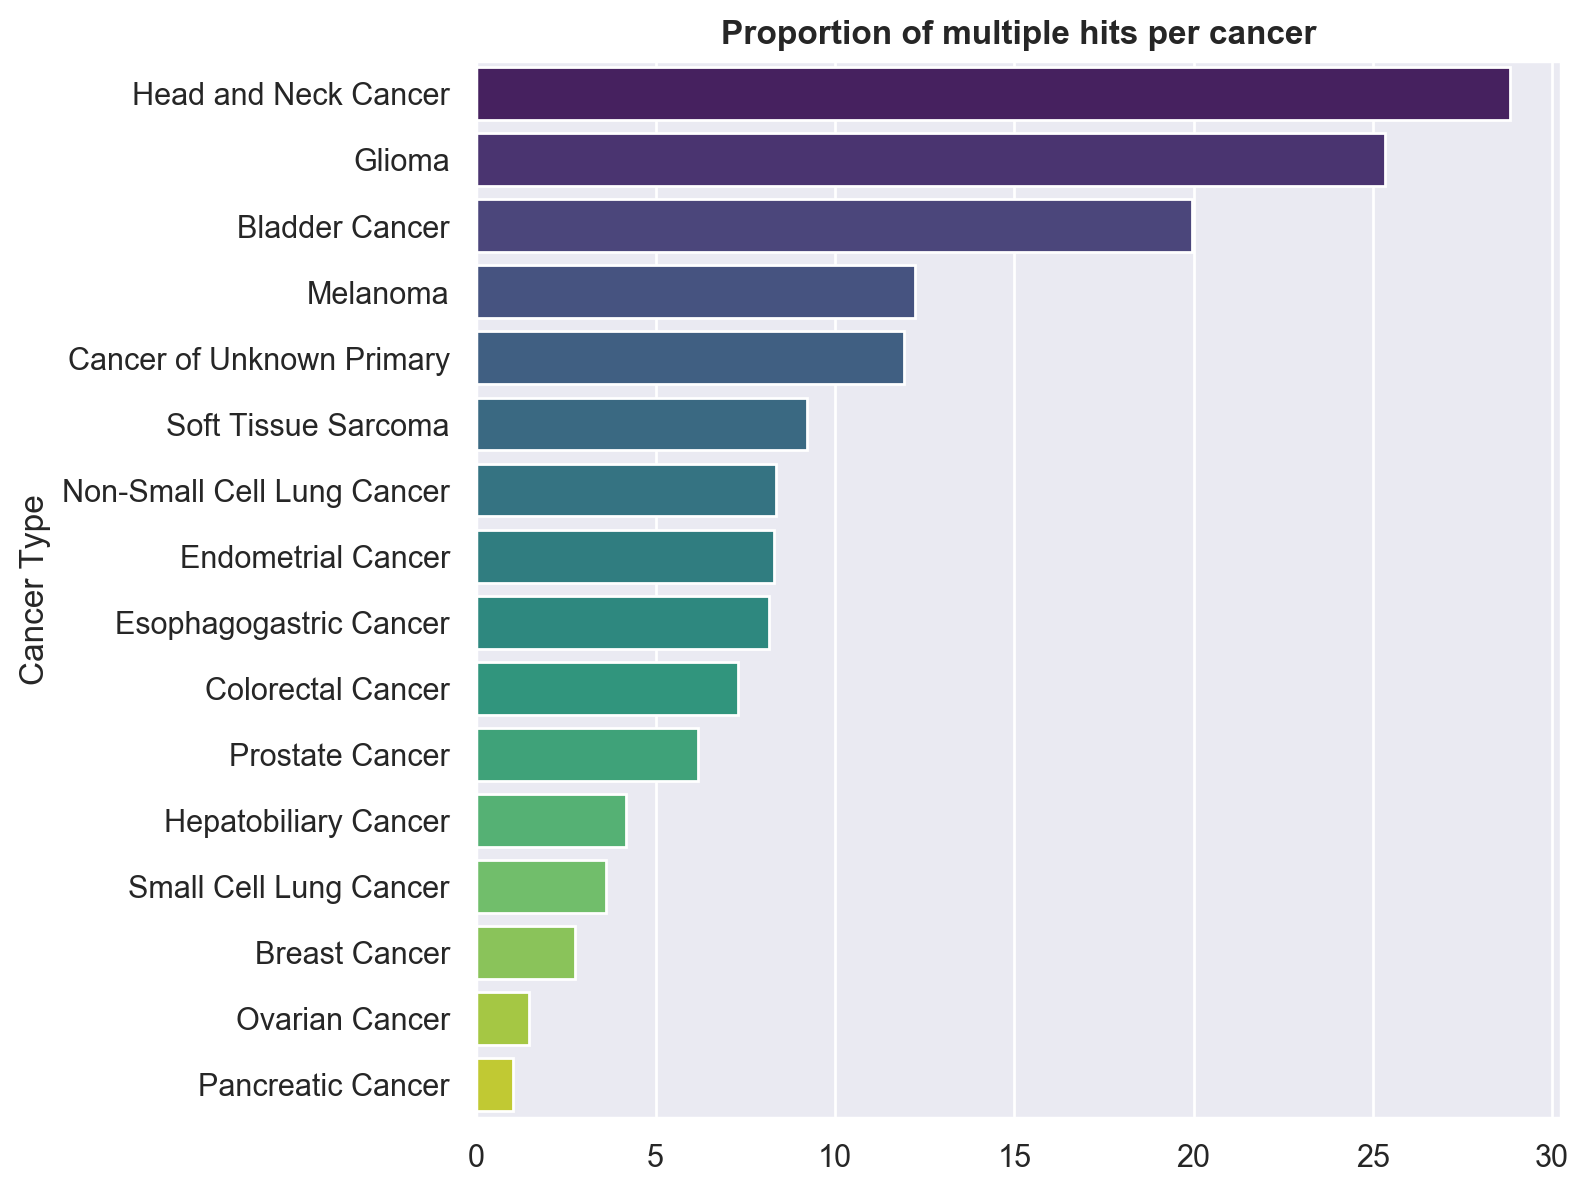

In [414]:
# we sort by ratio
number_hits = number_hits.sort_values(by=['ratio'], ascending=False)
#plot
get_ploth(number_hits.index, 
          'ratio', 
          number_hits, 
          'Cancer Type', 
          '',
          'Proportion of multiple hits per cancer',
          figsize=(7,7), 
          perc=False)

### Primary Samples

,one,two,three,four,five,ratio
Cancer_Type,,,,,,
Pancreatic Cancer,515.0,4.0,0.0,0.0,0.0,0.77
Ovarian Cancer,291.0,4.0,2.0,0.0,0.0,2.02
Breast Cancer,696.0,17.0,1.0,1.0,0.0,2.66
Small Cell Lung Cancer,120.0,4.0,0.0,0.0,0.0,3.23
Hepatobiliary Cancer,150.0,8.0,0.0,0.0,0.0,5.06
Prostate Cancer,180.0,13.0,1.0,0.0,0.0,7.22
Endometrial Cancer,314.0,22.0,4.0,0.0,1.0,7.92
Colorectal Cancer,1274.0,97.0,15.0,2.0,0.0,8.21
Esophagogastric Cancer,355.0,32.0,2.0,3.0,0.0,9.44


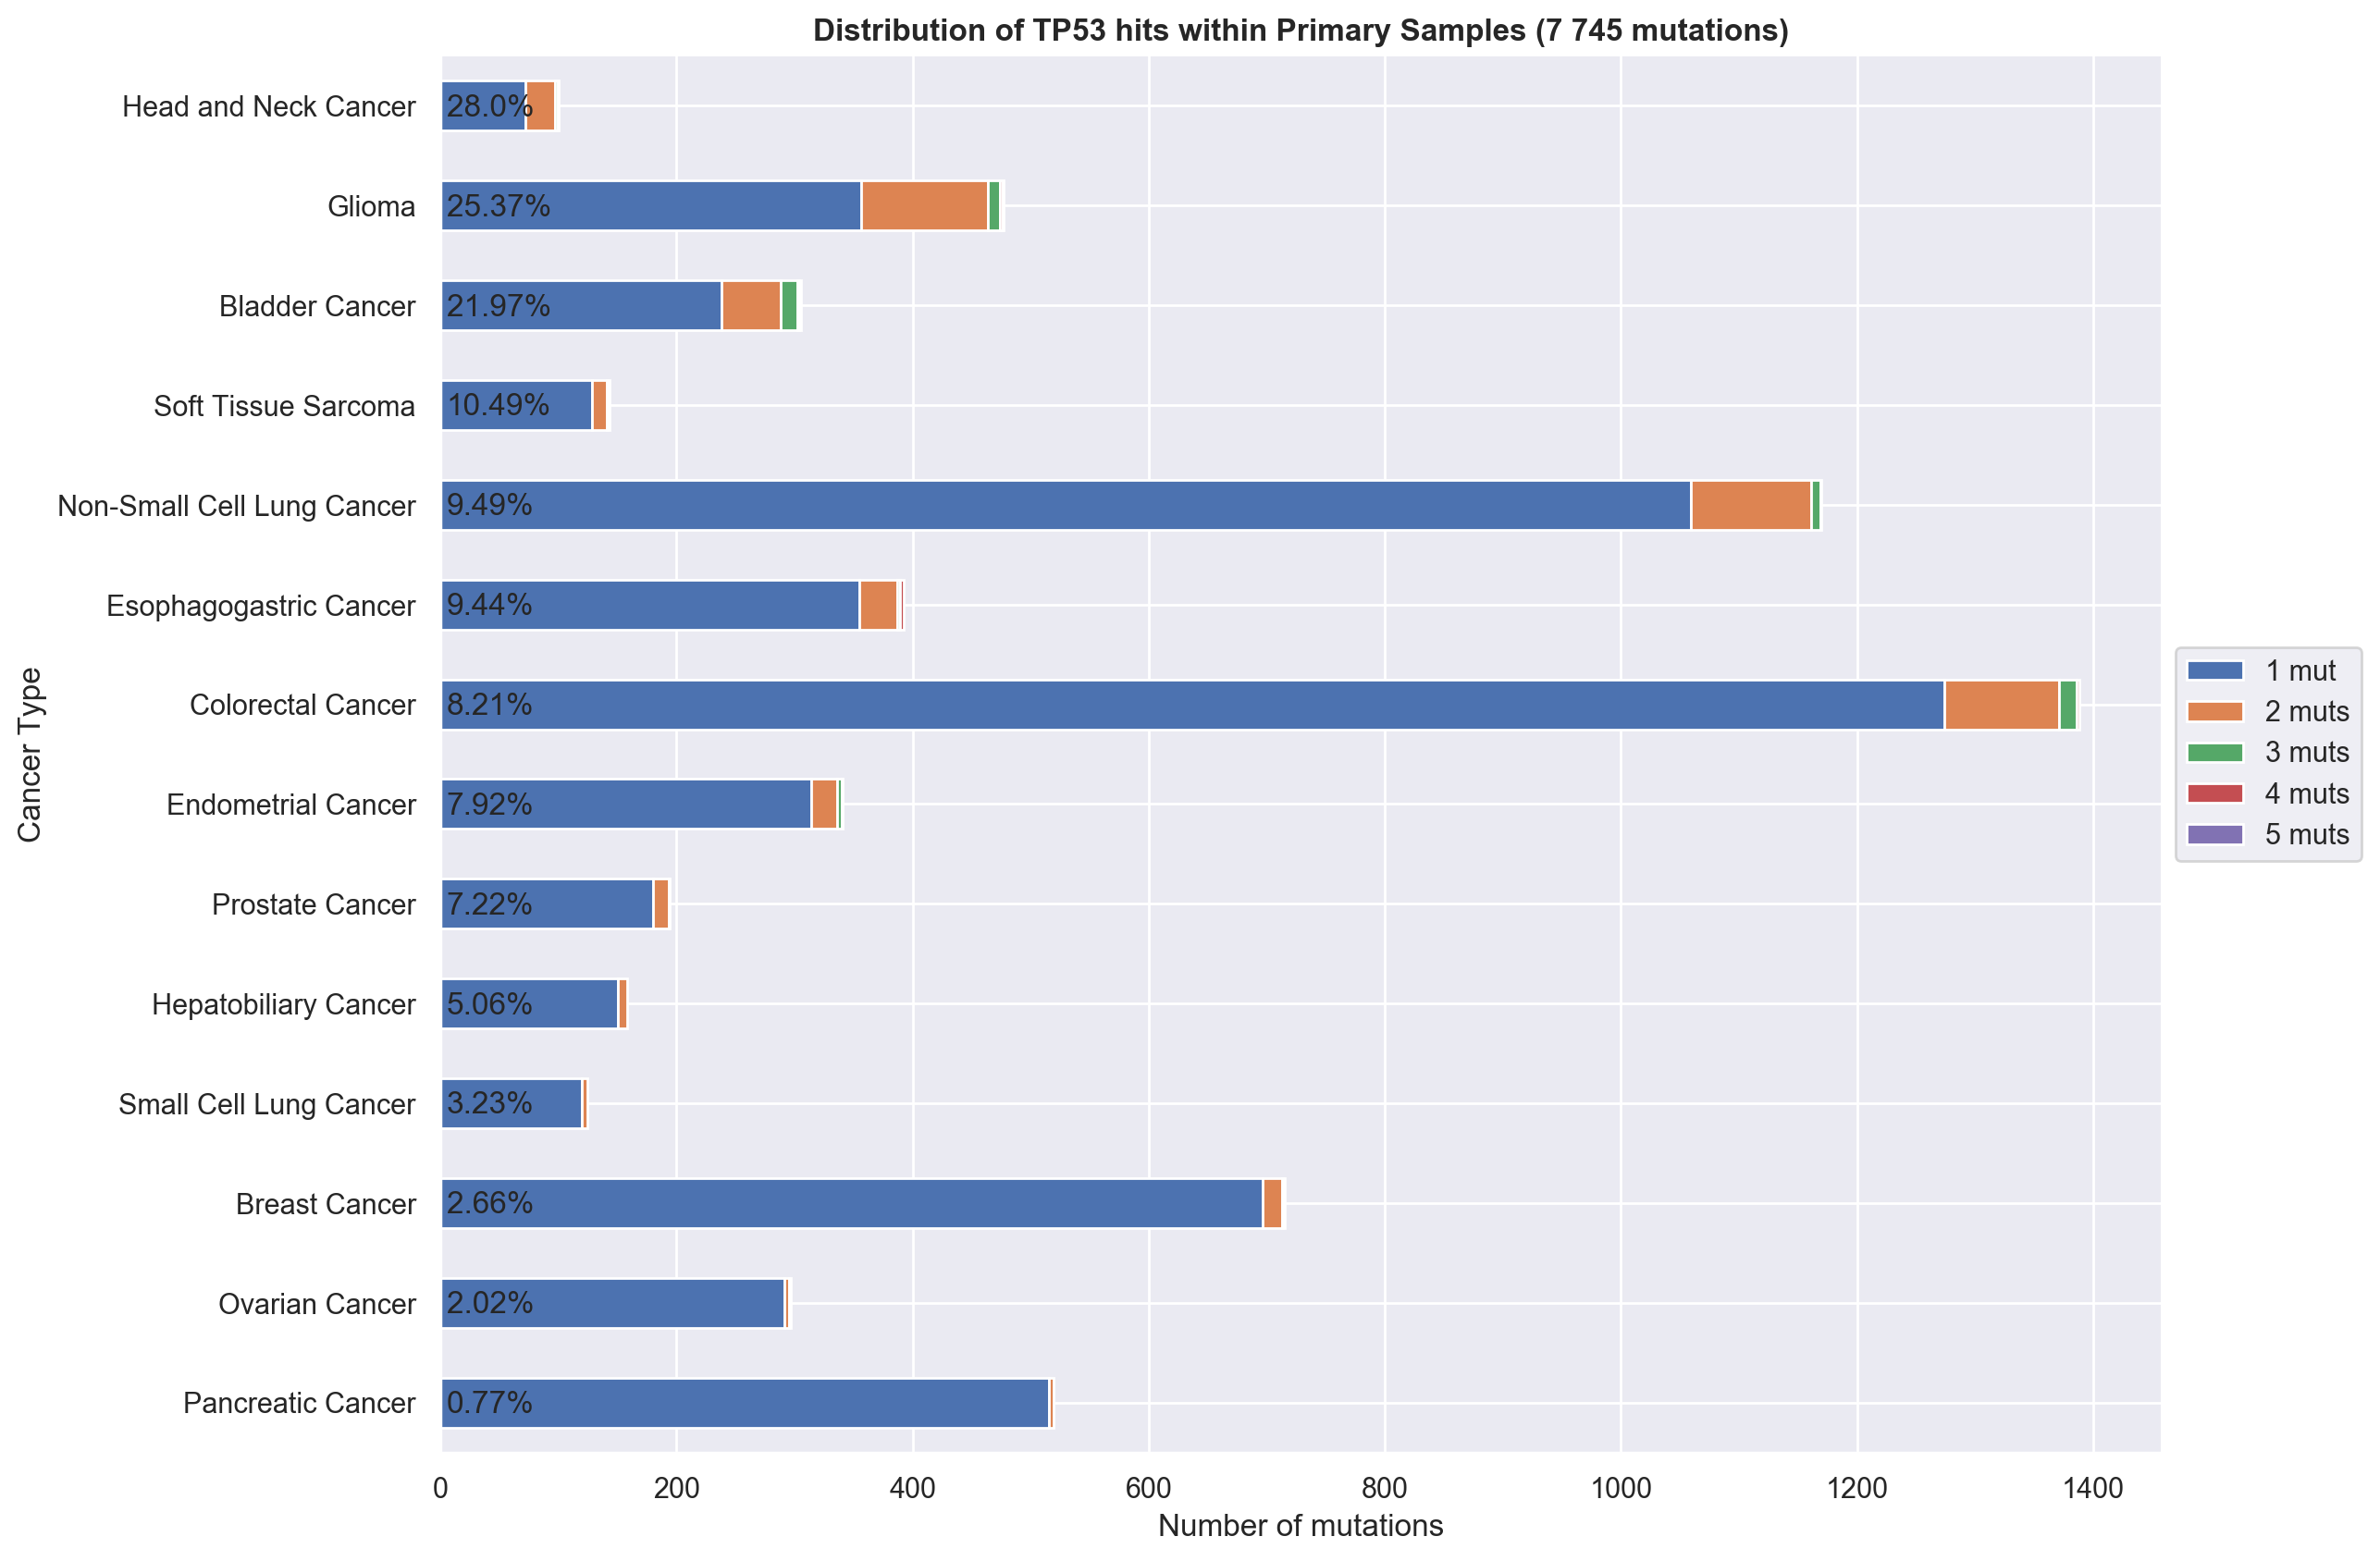

In [9]:
primary_hits = get_numberhits('Primary', 50)
display(primary_hits)

# We plot the table
get_mstacked_plot(primary_hits[['one', 'two', 'three','four','five']], 
                  'Distribution of TP53 hits within Primary Samples (7 745 mutations)',
                  ['1 mut', '2 muts', '3 muts', '4 muts', '5 muts'],
                  'Number of mutations',
                  'Cancer Type',
                  figsize = (15,10),
                  labels = list(primary_hits['ratio']),
                  horiz=True)

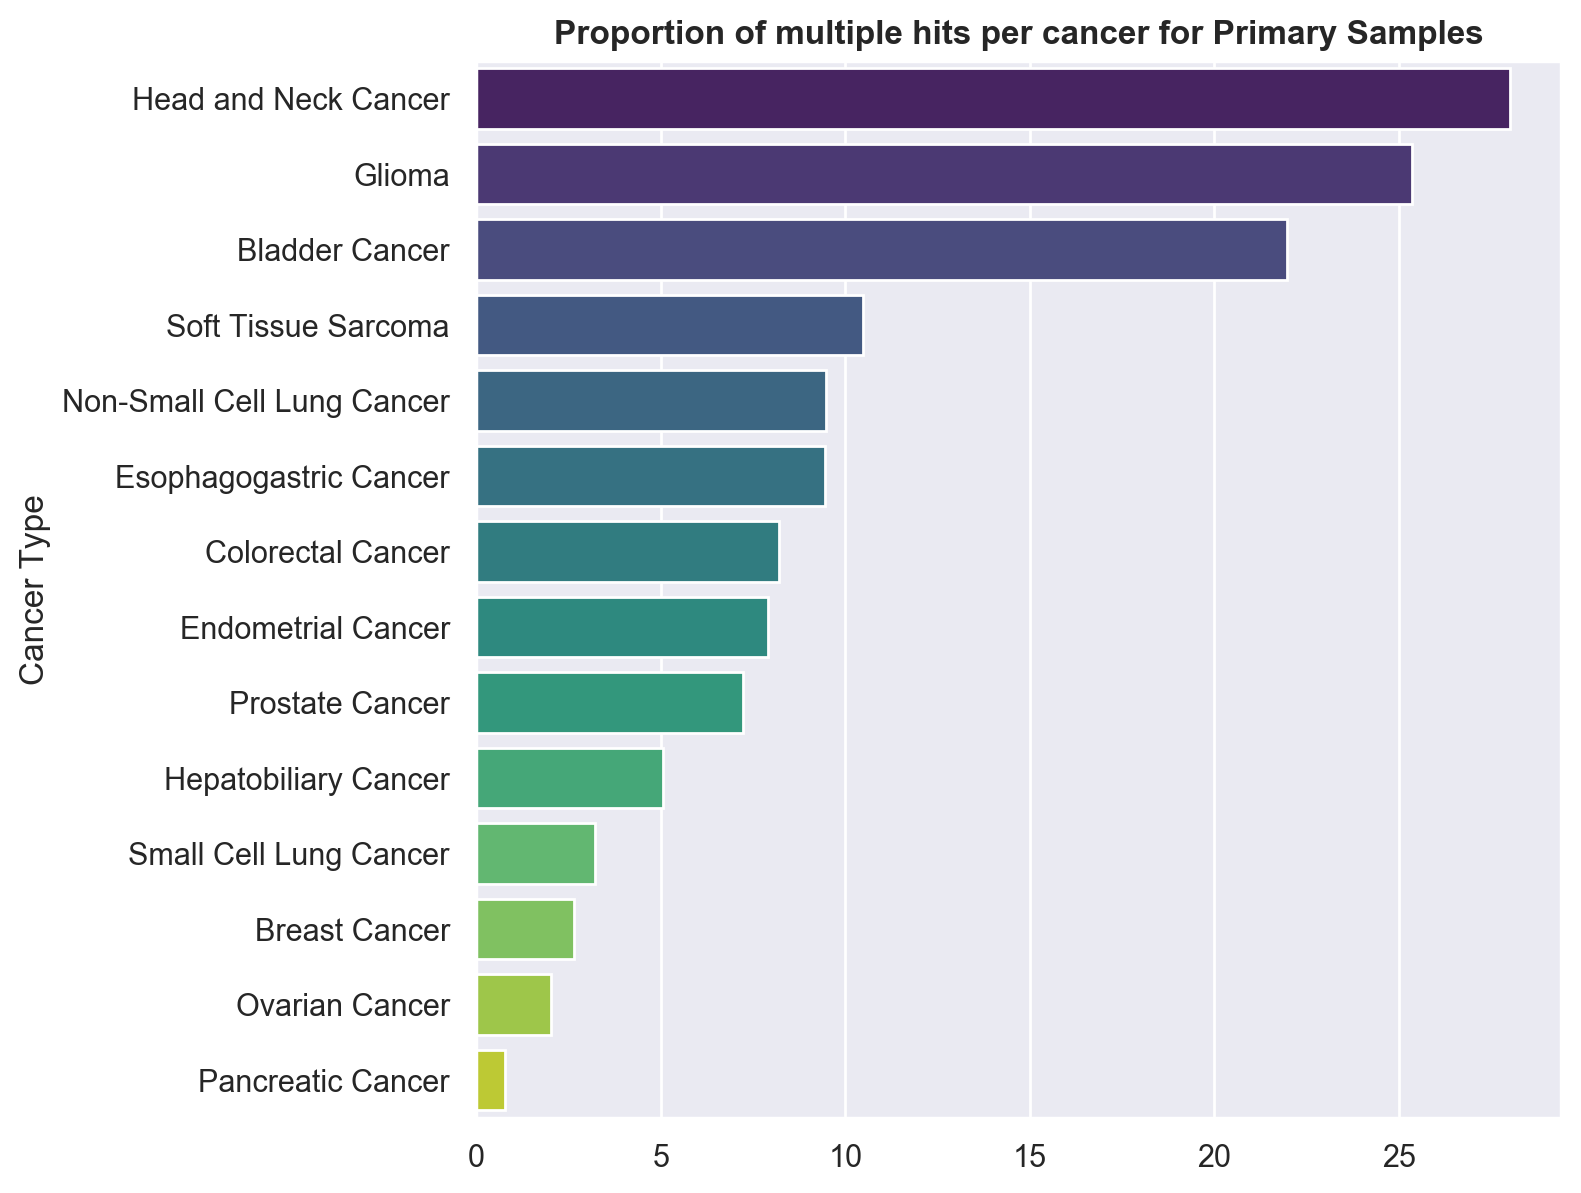

In [420]:
#sort
primary_hits = primary_hits.sort_values(by=['ratio'], ascending = False)
#plot
get_ploth(primary_hits.index, 
          'ratio',
          primary_hits, 
          'Cancer Type', 
          '',
          'Proportion of multiple hits per cancer for Primary Samples',
          figsize=(7,7),
          perc=False)

### Metastatis Samples

,one,two,three,four,five,ratio
Cancer_Type,,,,,,
Pancreatic Cancer,451.0,2.0,1.0,0.0,0.0,0.66
Ovarian Cancer,450.0,4.0,1.0,0.0,0.0,1.10
Hepatobiliary Cancer,79.0,1.0,1.0,0.0,0.0,2.47
Breast Cancer,657.0,14.0,4.0,0.0,0.0,2.67
Esophagogastric Cancer,131.0,4.0,1.0,0.0,0.0,3.68
Small Cell Lung Cancer,119.0,5.0,0.0,0.0,0.0,4.03
Prostate Cancer,214.0,11.0,1.0,0.0,0.0,5.31
Colorectal Cancer,660.0,37.0,1.0,0.0,0.0,5.44
Non-Small Cell Lung Cancer,826.0,46.0,3.0,0.0,0.0,5.60


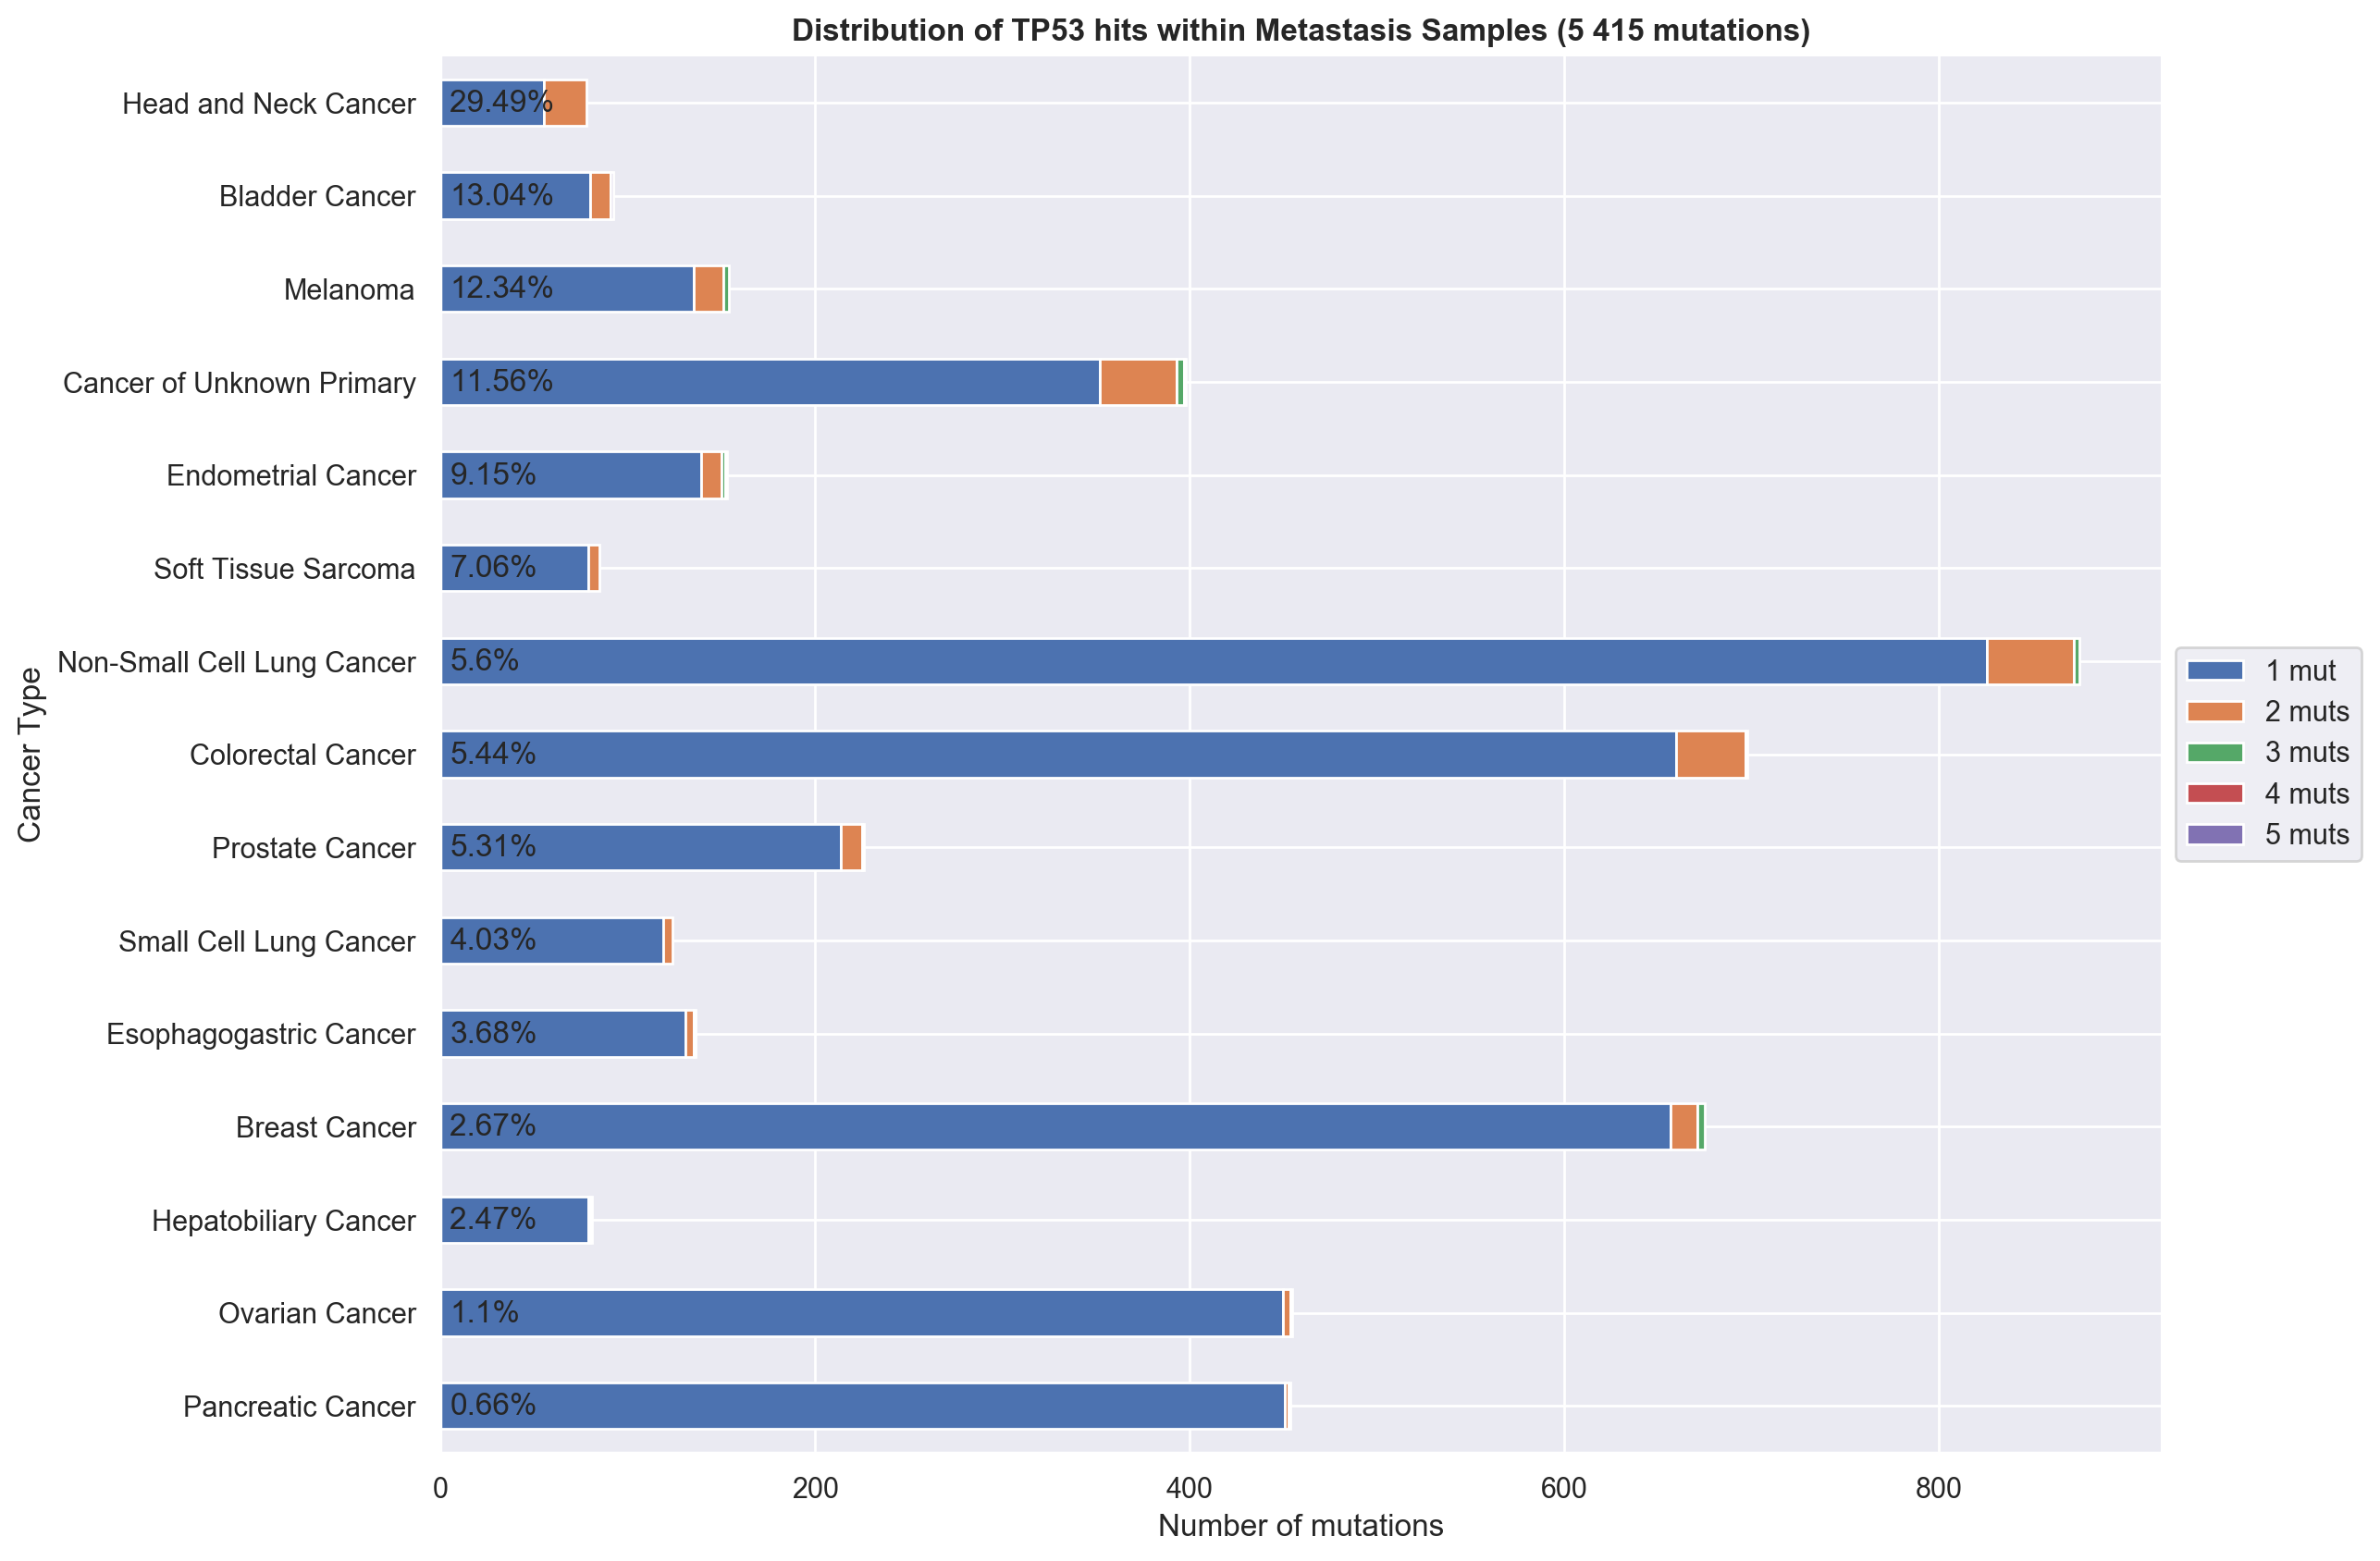

In [7]:
metastasis_hits = get_numberhits('Metastasis', 50)
display(metastasis_hits)

# We plot the table
get_mstacked_plot(metastasis_hits[['one', 'two', 'three','four','five']], 
                  'Distribution of TP53 hits within Metastasis Samples (5 415 mutations)',
                  ['1 mut', '2 muts', '3 muts', '4 muts', '5 muts'],
                  'Number of mutations',
                  'Cancer Type',
                  figsize = (15,10), 
                  labels = list(metastasis_hits['ratio']),
                  horiz=True)

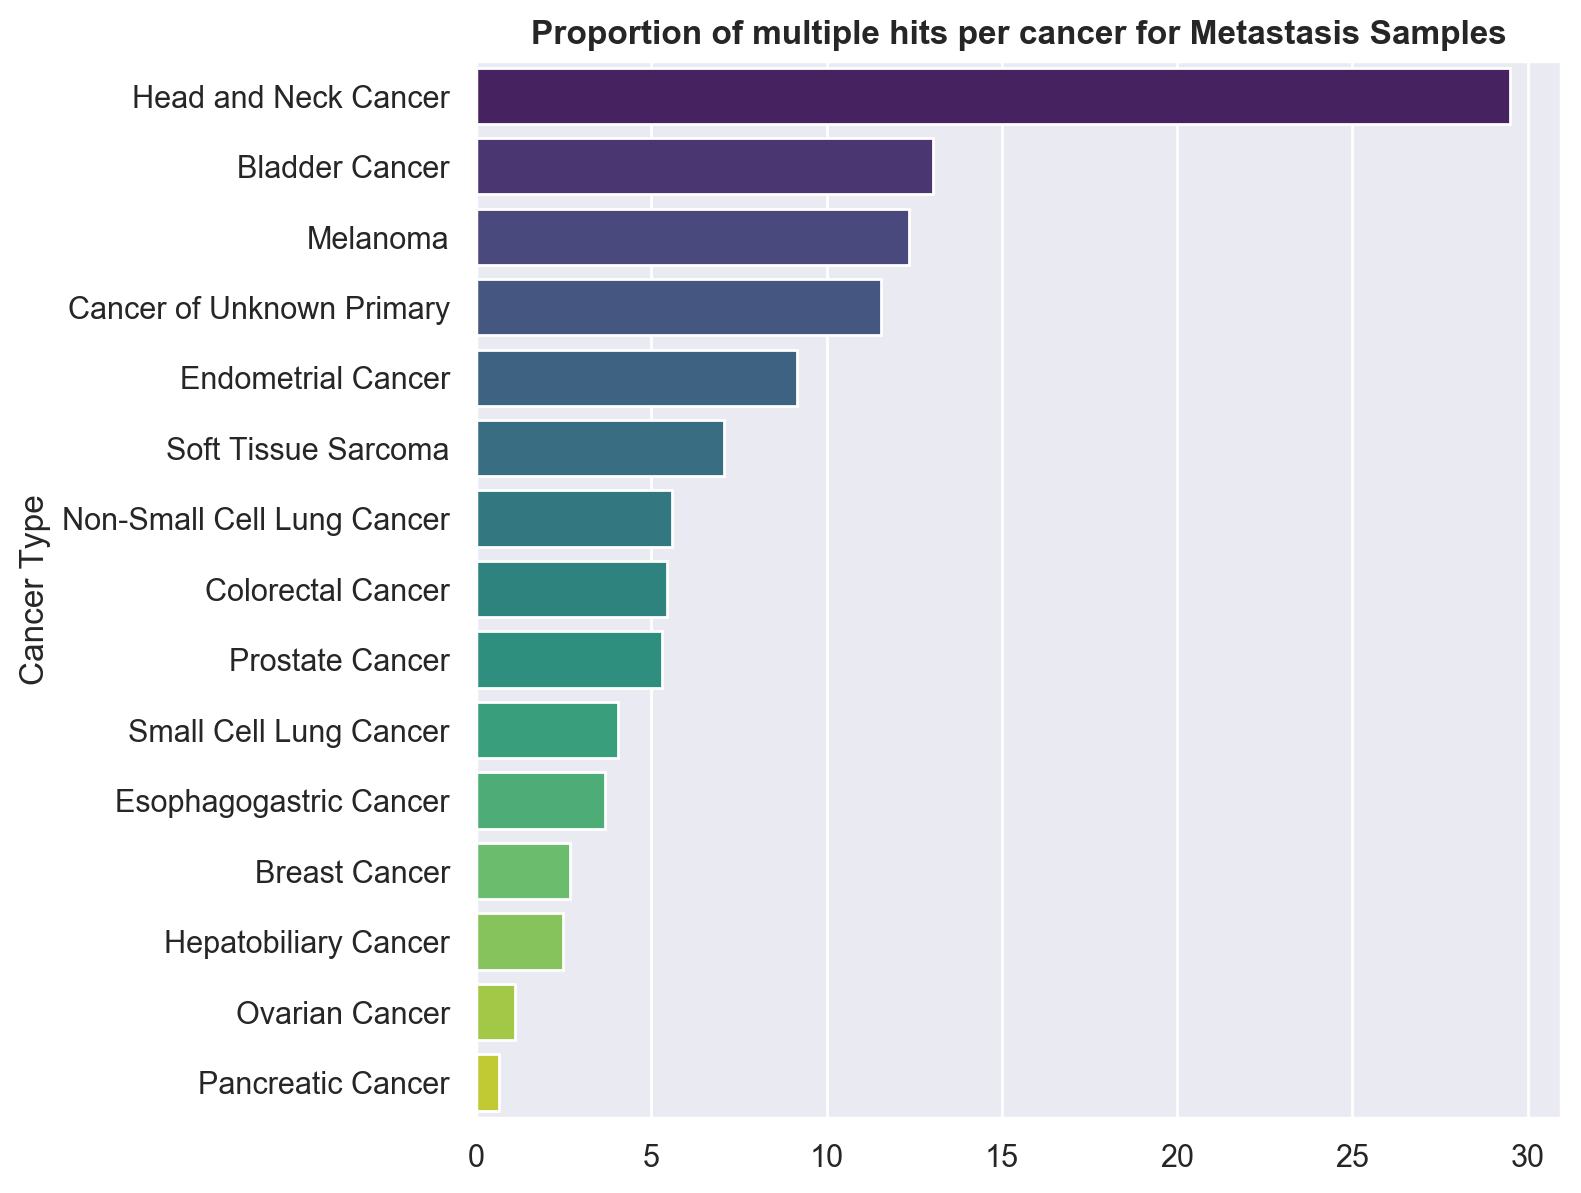

In [428]:
#sort
metastasis_hits = metastasis_hits.sort_values(by=['ratio'], ascending = False)
#plot
get_ploth(metastasis_hits.index, 
          'ratio', 
          metastasis_hits, 
          'Cancer Type', 
          '',
          'Proportion of multiple hits per cancer for Metastasis Samples',
          figsize=(7,7), 
          perc=False)

---
*Remarks:*
* **Glioma**: almost only Primary Samples (477 / 501 patients) but high ratio 25.3 %
* **Head and Neck Cancer** has the highest ratio for all samples (~ 30 %) but only 176 patients
* **Bladder Cancer** has also high ratio in both samples (21 % and 13%)
* **NSCLC** and **CC** are the two most represented cancer: 2027 and 2081 patients. They have average sample type ratios
    - NSCLC: also enriched in multi hits in Primary Samples compared to Metastasis (~9 % against 4 %)
    - CC: same (8.2 againt 5.5)
* **Breast, Pancreatic and Ovarian Cancers** are  quite represented in the cohort (1 385, 969 and 751 patients) but have a very low sample type ratios 
    * &rarr; Breast Cancer: 2.7%  ;  Ovarian Cancer: 1.5 %  ;  Pancreatic Cancer: 1 %
---


## Purity, CCF, VAF Densities

In [27]:
#we filter out the duplicates
maf_tp53_unique = maf_tp53.drop_duplicates('sample_mut_key')
maf_tp53_unique

,Hugo_Symbol,Chromosome,Start_Position,End_Position,Variant_Classification,Variant_Type,Reference_Allele,Tumor_Seq_Allele1,Tumor_Seq_Allele2,HGVSp,Consequence,mutation_effect,cf,ccf_expected_copies,purity,t_var_freq,Tumor_Sample_Barcode,mut_key,Patient_Id,sample_mut_key,patient_mut_key,mut_spot,Sample_Id,Patient_Current_Age,Cancer_Type,Cancer_Type_Detailed,Ethnicity_Category,Sex,Overall_Survival_Months,Sample_Type,Primary_Tumor_Site
0,TP53,17,7578409,7578410,Missense_Mutation,DNP,CT,CT,TC,p.Arg174Glu,missense_variant,Likely Loss-of-function,0.315621,0.925,0.308886,0.168901,P-0027408-T01-IM6,17_7578409_CT_TC,P-0027408,P-0027408-T01-IM6_17_7578409_CT_TC,P-0027408_17_7578409_CT_TC,174,P-0027408-T01-IM6,67.0,Non-Small Cell Lung Cancer,Non-Small Cell Lung Cancer,Non-Spanish; Non-Hispanic,Female,22.586,Metastasis,Lung
1,TP53,17,7577121,7577121,Missense_Mutation,SNP,G,G,A,p.Arg273Cys,missense_variant,Likely Loss-of-function,0.325590,0.812,0.384643,0.312169,P-0036909-T01-IM6,17_7577121_G_A,P-0036909,P-0036909-T01-IM6_17_7577121_G_A,P-0036909_17_7577121_G_A,273,P-0036909-T01-IM6,47.0,Non-Small Cell Lung Cancer,Lung Adenocarcinoma,Non-Spanish; Non-Hispanic,Female,13.644,Metastasis,Lung
2,TP53,17,7578442,7578442,Missense_Mutation,SNP,T,T,C,p.Tyr163Cys,missense_variant,Loss-of-function,0.832723,0.935,0.861984,0.845070,P-0023546-T01-IM6,17_7578442_T_C,P-0023546,P-0023546-T01-IM6_17_7578442_T_C,P-0023546_17_7578442_T_C,163,P-0023546-T01-IM6,50.0,Prostate Cancer,Prostate Neuroendocrine Carcinoma,Non-Spanish; Non-Hispanic,Male,4.800,Primary,Prostate
3,TP53,17,7578442,7578442,Missense_Mutation,SNP,T,T,C,p.Tyr163Cys,missense_variant,Loss-of-function,0.307591,1.000,0.567171,0.636735,P-0023546-T02-IM6,17_7578442_T_C,P-0023546,P-0023546-T02-IM6_17_7578442_T_C,P-0023546_17_7578442_T_C,163,P-0023546-T02-IM6,50.0,Prostate Cancer,Prostate Adenocarcinoma,Non-Spanish; Non-Hispanic,Male,4.800,Primary,Prostate
4,TP53,17,7578471,7578471,Frame_Shift_Del,DEL,G,G,-,p.Gly154AlafsTer16,frameshift_variant,Likely Loss-of-function,0.892744,1.000,0.890701,0.912621,P-0025997-T01-IM6,17_7578471_G_-,P-0025997,P-0025997-T01-IM6_17_7578471_G_-,P-0025997_17_7578471_G_-,154,P-0025997-T01-IM6,70.0,Cancer of Unknown Primary,Small Cell Carcinoma of Unknown Primary,Non-Spanish; Non-Hispanic,Female,0.000,Metastasis,Cancer of Unknown Primary
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13882,TP53,17,7578291,7578291,Splice_Site,SNP,T,T,G,NaN,splice_acceptor_variant,Likely Loss-of-function,0.211973,1.000,0.220008,0.126382,P-0050748-T01-IM6,17_7578291_T_G,P-0050748,P-0050748-T01-IM6_17_7578291_T_G,P-0050748_17_7578291_T_G,NaN,P-0050748-T01-IM6,57.0,Pancreatic Cancer,Pancreatic Adenocarcinoma,NaN,Male,0.460,Primary,Pancreas
13883,TP53,17,7578394,7578394,Missense_Mutation,SNP,T,T,A,p.His179Leu,missense_variant,Loss-of-function,0.824066,1.000,0.833058,0.757801,P-0050741-T01-IM6,17_7578394_T_A,P-0050741,P-0050741-T01-IM6_17_7578394_T_A,P-0050741_17_7578394_T_A,179,P-0050741-T01-IM6,46.0,Small Cell Lung Cancer,Small Cell Lung Cancer,Non-Spanish; Non-Hispanic,Male,1.282,Metastasis,Lung
13884,TP53,17,7577570,7577570,Missense_Mutation,SNP,C,C,T,p.Met237Ile,missense_variant,Likely Loss-of-function,0.254038,0.937,0.305687,0.168975,P-0050747-T01-IM6,17_7577570_C_T,P-0050747,P-0050747-T01-IM6_17_7577570_C_T,P-0050747_17_7577570_C_T,237,P-0050747-T01-IM6,72.0,Pancreatic Cancer,Pancreatic Adenocarcinoma,NaN,Female,NaN,Primary,Pancreas
13885,TP53,17,7578208,7578208,Missense_Mutation,SNP,T,T,C,p.His214Arg,missense_variant,Likely Loss-of-function,1.000000,NaN,NaN,0.082168,P-0050652-T01-IM6,17_7578208_T_C,P-0050652,P-0050652-T01-IM6_17_7578208_T_C,P-0050652_17_7578208_T_C,214,P-0050652-T01-IM6,56.0,Pancreatic Cancer,Pancreatic Adenocarcinoma,Non-Spanish; Non-Hispanic,Male,1.085,Primary,Pancreas


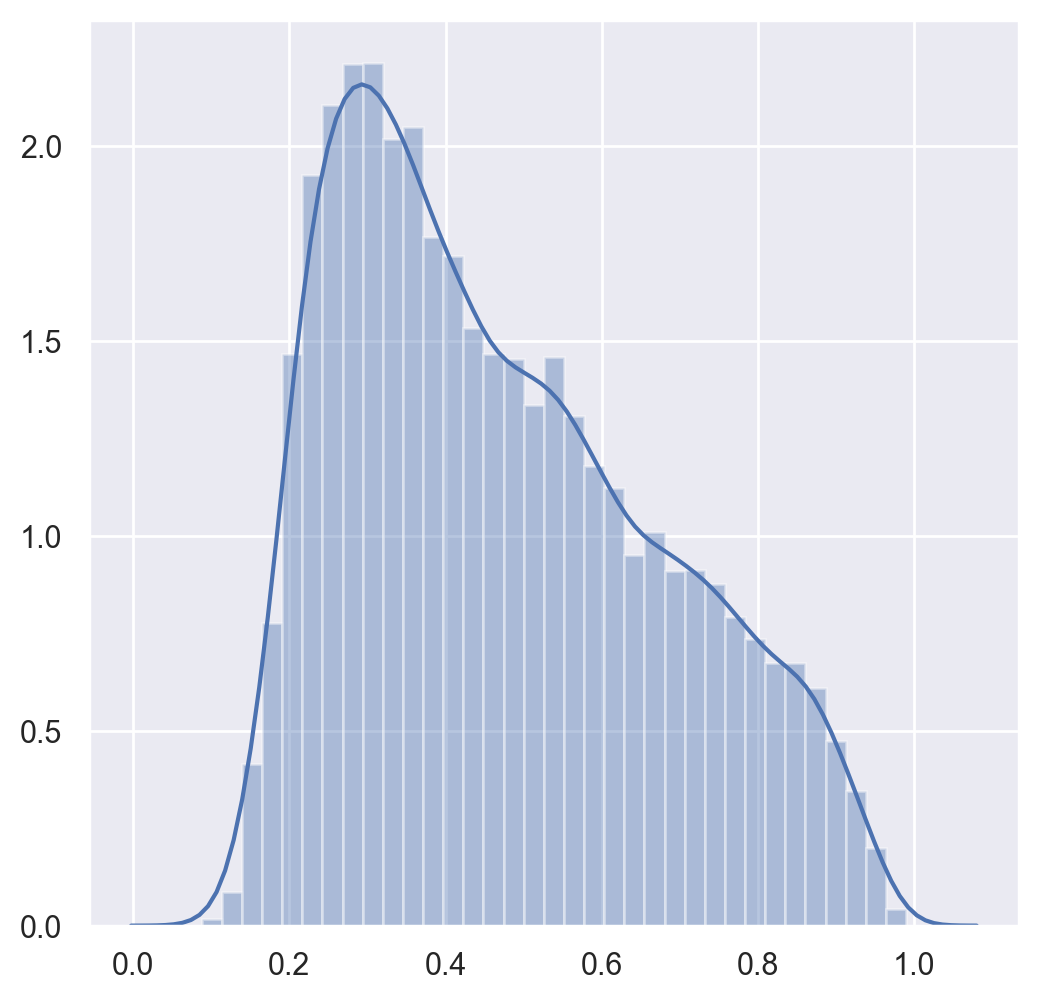

In [28]:
ax = sns.distplot(maf_tp53_unique[['purity']])

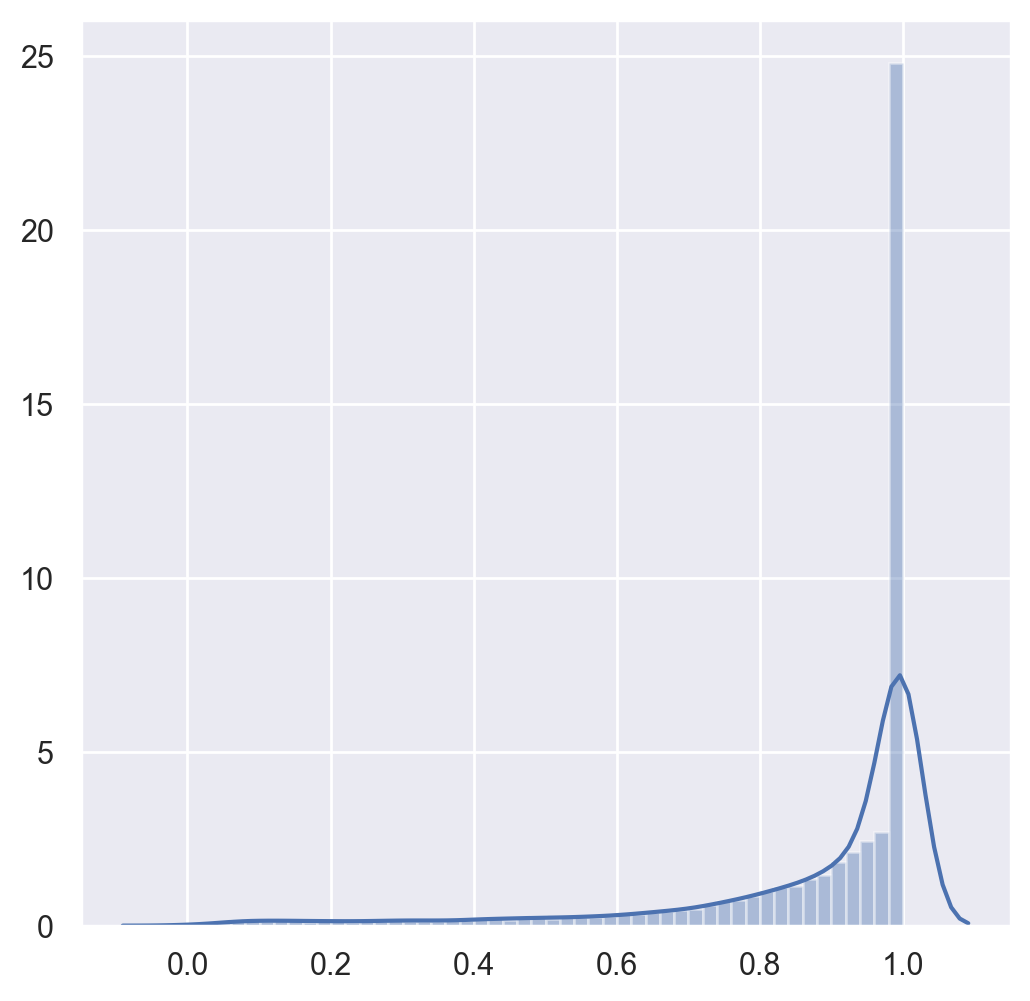

In [29]:
ax = sns.distplot(maf_tp53_unique[['ccf_expected_copies']])

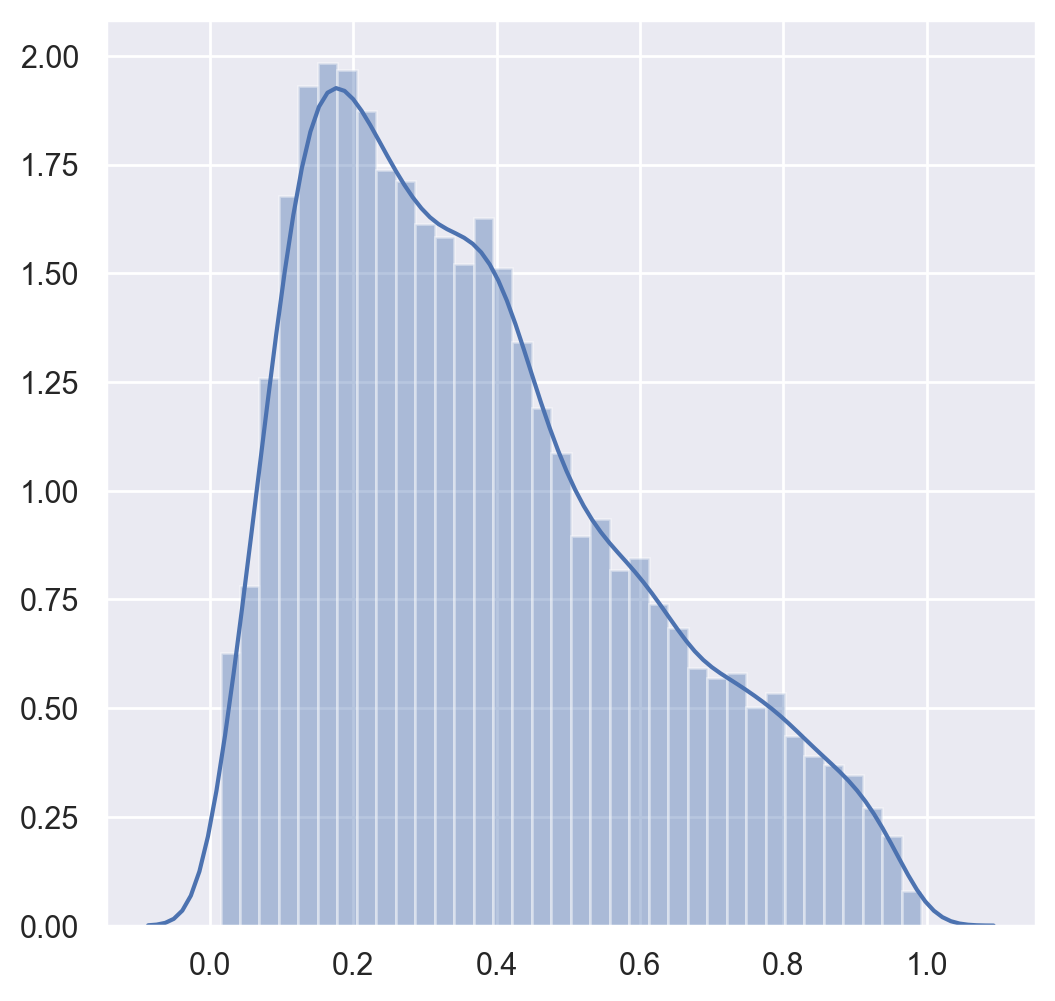

In [30]:
ax = sns.distplot(maf_tp53_unique[['t_var_freq']])

In [35]:
def plot_vaf_ccf_purity(kind, cancer_type, sample=None):
    # We load the table 
    maf_tp53 = pd.read_pickle(data_path + 'merged_data/maf_tp53.pkl')
    #we filter out the duplicates
    maf_tp53_unique = maf_tp53.drop_duplicates('sample_mut_key')
    # We filter only the cancer we want
    maf_tp53_unique = maf_tp53_unique[maf_tp53_unique['Cancer_Type'] == cancer_type]
    if sample:
        # We filter on the sample
        maf_tp53_unique = maf_tp53_unique[maf_tp53_unique['Sample_Type'] == sample]
    # We plot
    ax = sns.distplot(maf_tp53_unique[[kind]])

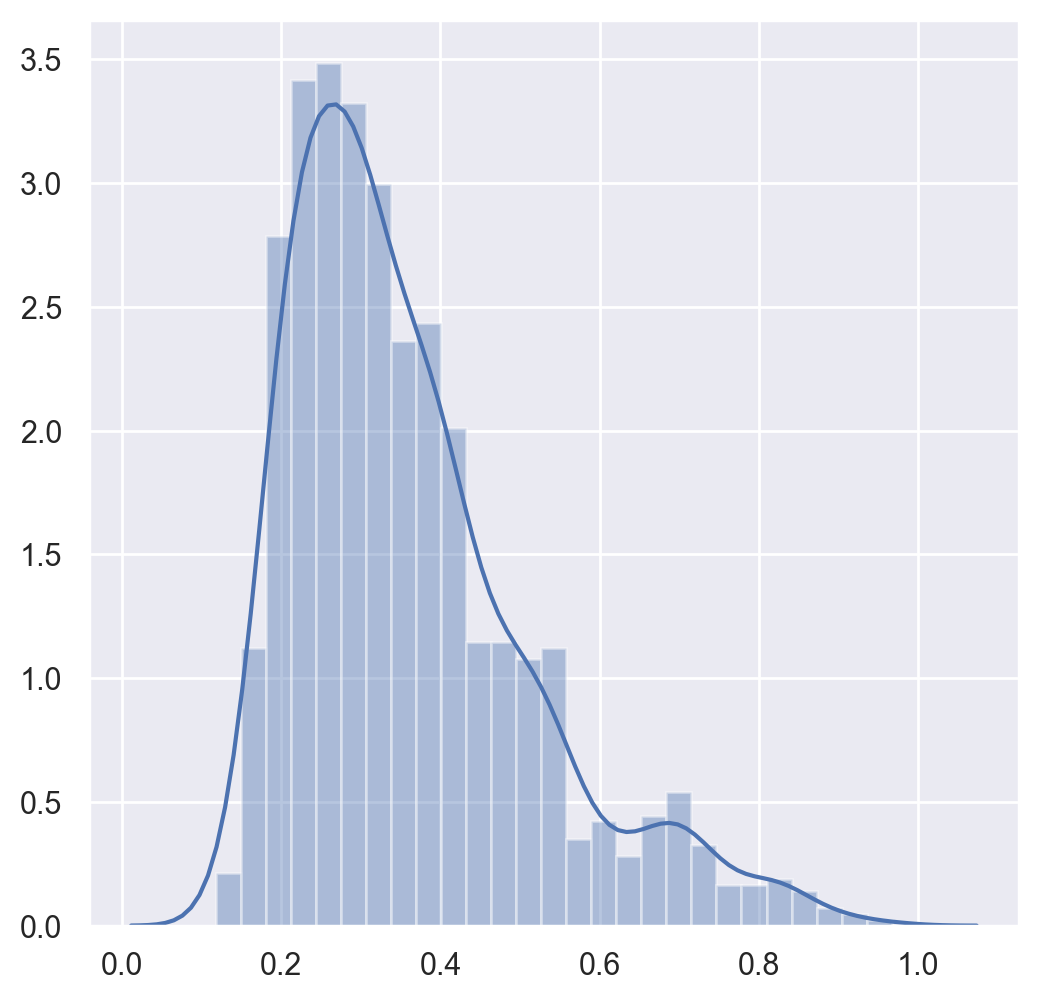

In [37]:
plot_vaf_ccf_purity('purity', 'Non-Small Cell Lung Cancer', 'Primary')

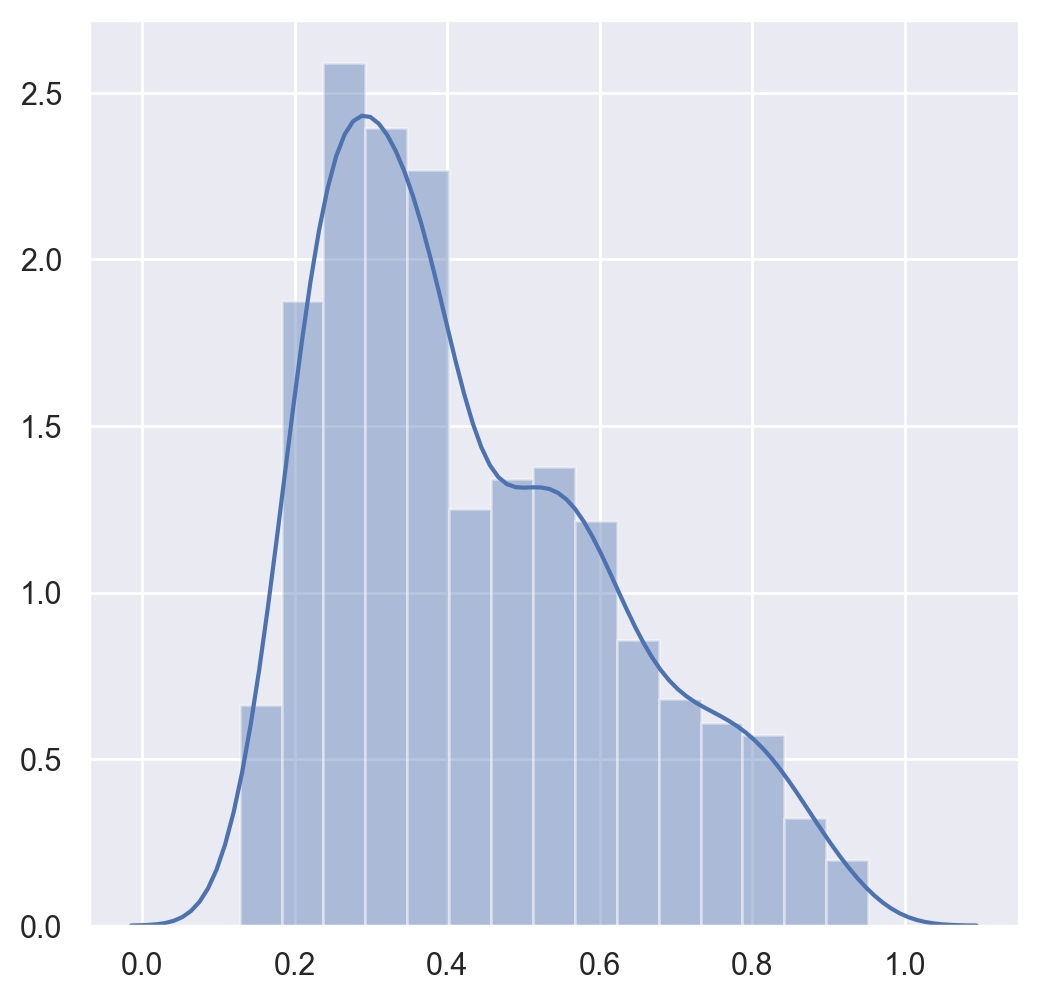

In [38]:
plot_vaf_ccf_purity('purity', 'Non-Small Cell Lung Cancer', 'Metastasis')

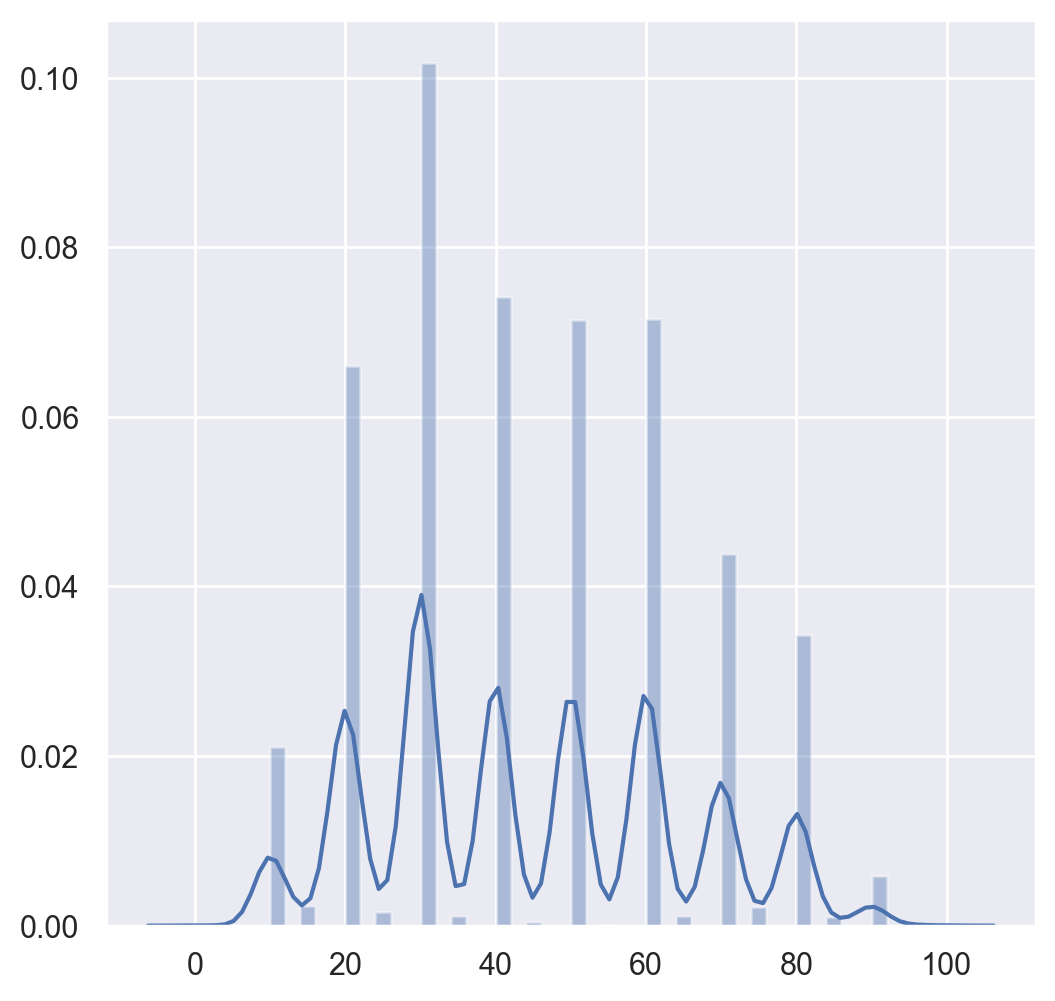

In [39]:
# We load the table 
maf_cohort = pd.read_pickle(data_path + 'merged_data/maf_cohort.pkl')
#we filter out the duplicates
maf_cohort_unique = maf_cohort.drop_duplicates('sample_mut_key')

# We plot
ax = sns.distplot(maf_cohort_unique[['purity']])